# Face Recognition

### !!This is a basic notebook, completing which you can get (preliminarly) 5/10 ponints. Other tasks which will get you more ponts are describes in a Slack channel.

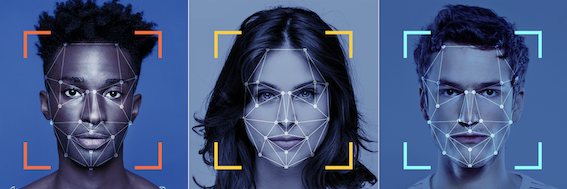

In this project you'll dive into face recognition framework and train neural network for face recognition task, play with losses and metrics.

We will train neural network on [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). 

As you see on the site, images of celebA dataset look like this:


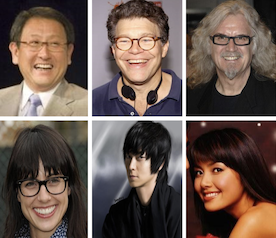

But we won't train a neural network for face recognition on those images. We'll need to preprocess them first. Let's see why we need it and how we need to preprocess them.

Let's look at how face recognition systems work:

## Face recognition model training and inference setup

This section describes how face recognition models are trained, what data alignment is and how the inference of face recognition model looks like. If you are familiar with this, you can skip this section.

### Model training

To train face recognition model on any facial dataset images must be aligned first. This step is very important to achieve a good quality of face recognition.

What is alignment: it consists of three steps:
1. Given image, identify facial landmarks on the image (coordinates of eyes, nose and mouth points). Separate neural network can be used there which was trained to identify landmarks on facial images. You can refer to [PyTorch Landmarks tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to see how this works.
2. Rotate all the images in the dataset so that eyes of the person on every image lie on a certain pre-defined horizontal line.
3. Scale all the images in the dataset so that the size of the faces are approximately identical.

Here's an example of what we would get after alignment of all the images of Aaron Peirsol from our dataset:

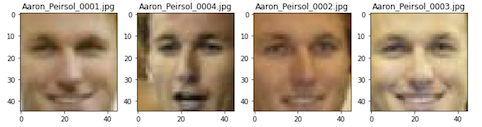

You see that eyes of all the faces lie on one horizontal line and all the faces have almost the same size. If we align all the images in the dataset, we can then train a neural network on aligned images.

**Why we need the alignment procedure**: the alignment of all faces in dataset makes the task of facial recognition easier for the model. If all the faces that model sees are of the same size and have their landmarks (eyes, nose, etc) on almost the same parts of the images, it is easier for the model to learn to identify a person on the image. The model diesn't need to "search" for the face and eyes positions on the image before performing a recognition.

If you are interested, you can also train a model on non-aligned images, but you'll see that it would perform badly. It is possible though to train a model for face recognition without pre-alignment of all the faces, but this would require a huge amount of data — more that almost any company has. The only company that has openly presented its face recognition system that does not require special alignment is Facebook — their neural network was trained on a really huge amount of data using a special trick to avoid alignment. You can read more details [here](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Model inference

So let's see how the model trained on aligned faces can be used in real world:

Let's assume you owe a company and you want to build a face recognition system for your working office. You decided to hang some cameras around the office and want them to be able to recognize faces of all your employees when they are sitting / walking around the office (we let you decide by yourself why you would need such a system in your office)


A system for face recognition typically conststs of 3 stages:
- face detection
- face alignment
- face recognition

Let's discuss them in detail:

**Face detection**

When the camera is hanged on the wall it records a video and splits the video into single images, like this:

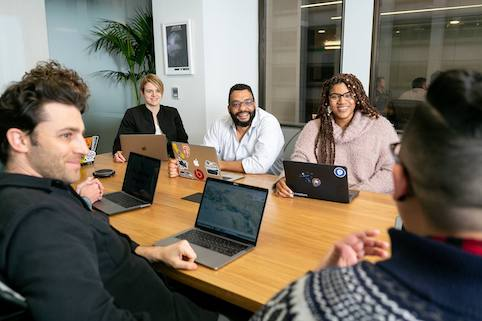

To be able to recognize all the faces on the photo you need first to detect all the faces that are present on the photo, like this:

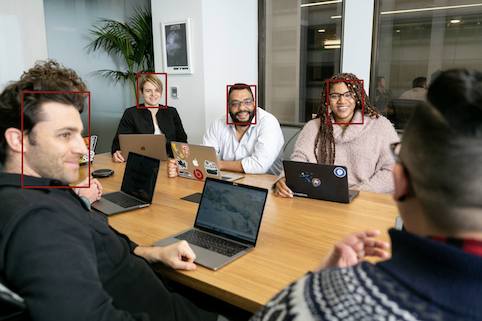

That is the first part — detection. You could use any neural network that can detect humans for this.

**Face alignment**

The second stage is to align all the faces found. The alignment procedure here should be the same as used to align training images.

So we'll get an image of a guy on a photo aligned like this:

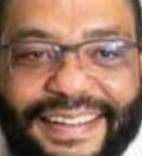

**Face recognition**

On the third stage we use the neural network that we trained to recognize a face.

So that's how the face recognition models pipeline work. You can also read about it more on [this link](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (and using internet search)

## Neural network model architecture 

Let's discuss how model for face recognition should look like.



The easiest and, actually, the most used way to build a neural network for face recognition is to build it as a **simple classifier**.

Assume we have a dataset with photos of N different people. Then we can build a neural network to classify all the images from the dataset into N classes. Each class refers to one unique person in the dataset.

**How do we recognize new people by this network then?** We actually want the network for face recognition to be able to recognize not only the people which are in training set, but almost every person in the world.

That is how: after training the model, we'll drop it's last classification layer. After that when we'll pass an image of the person through network, we'll get the output of the pre-last layer — it's **the embedding of the image**. Having embeddings of two different images we can compare them using **cosine distance**. The less the distance is — the higher the probability that those two photos belong to one person is. 

Using that technique we can get embeddings of every image — even of unseen people, compare them, and reveal images belonging to same people. 

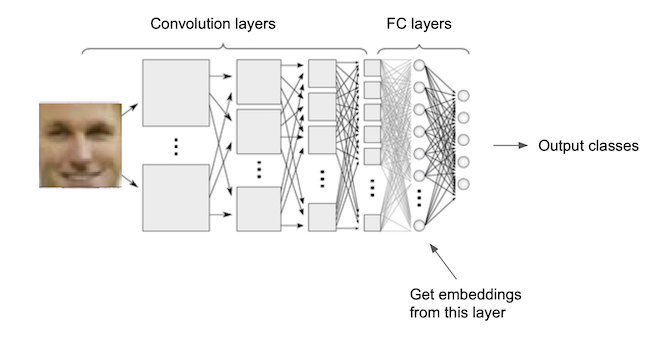

## Task 1 (30% points): build a neural network for faces classification as discribed above.

### Dataset 

We will train out face recognition network on part of the [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). But we'll use a version of it that has all the images in it aligned and cropped. You can download the dataset using this link: https://disk.yandex.ru/d/S8f03spLIA1wrw

In [2]:
# this link won't work for you, if you want to generate working link, 
# visit 500 classes https://askubuntu.com/questions/1188381/how-to-get-link-of-file-to-download-with-wget
# 1000 classes https://disk.yandex.ru/d/FVFucEDrZaxI9g
# or download the data and place it to folder manually
! wget "https://s765sas.storage.yandex.net/rdisk/1e2b09ae97f3b382a31fcef79c11af49f328871983ba438471c4c87643132d3d/620839e7/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid=182045977&filename=celebA_train_1k.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=182045977&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2&etag=0e9fb41a19ad84f907bc167bbc55bb03&rtoken=7HTWudCPMq83&force_default=yes&ycrid=na-4cbe67b74e52db65532b95b1c3b94774-downloader12e&ts=5d7da058507c0&s=b7f49ac421ccfa043e664c3ee6ef173f762286ce91687359106f7604d137f084&pb=U2FsdGVkX1-Wi-WEN7iOfwmAE7Dr0zMJUXMKKhW4XUihvqiUvuTcrres_GK6Ch2fgWisxoaUHNhjWLRcNs6oJbFINK3cAy4bJRISovrtxAc" -O celebA.zip
! unzip celebA.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: celebA_train_1k/celebA_imgs/049159.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._049159.jpg  
  inflating: celebA_train_1k/celebA_imgs/105435.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._105435.jpg  
  inflating: celebA_train_1k/celebA_imgs/068197.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._068197.jpg  
  inflating: celebA_train_1k/celebA_imgs/092985.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._092985.jpg  
  inflating: celebA_train_1k/celebA_imgs/057367.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._057367.jpg  
  inflating: celebA_train_1k/celebA_imgs/097625.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._097625.jpg  
  inflating: celebA_train_1k/celebA_imgs/157415.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._157415.jpg  
  inflating: celebA_train_1k/celebA_imgs/131790.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_

Let's look at the data first:

In [ ]:
! ls celebA_train_1k/

celebA_anno.txt  celebA_imgs  celebA_train_split.txt


- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

In [3]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform
from tqdm.autonotebook import tqdm, trange

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

import torch.optim as optim
from torch.optim import lr_scheduler

import time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


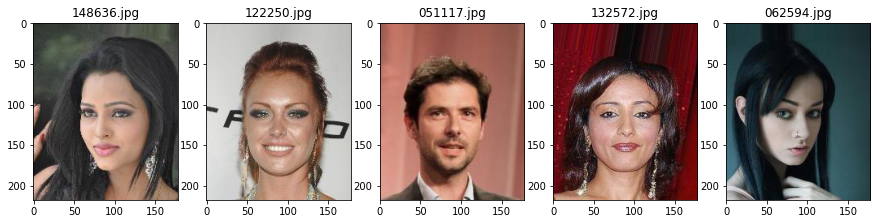

In [ ]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

images_names = os.listdir('./celebA_train_1k/celebA_imgs/')[:5]
show_imgs(images_names)


### Train Neural Network

Let's build a Datasets and network using this images:

In [22]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)


class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        
        sample = [image, int(label)]

        sample[0] = self.transform(sample[0])

        return sample

In [23]:
train_transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.RandomHorizontalFlip(), # нужно для Data Augmentation (добавляем в обучающий датасет картинки, отраженные по горизонтали)
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_data = celebADataset('train', train_transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# choose your own batch_size
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

We'll use pretrained on VGGFace2 network InceptionResnetV1 from here: https://github.com/timesler/facenet-pytorch/tree/master/models

In [5]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [25]:
! ls models

inception_resnet_v1.py	mtcnn.py  __pycache__  utils


In [6]:
from models import inception_resnet_v1

# берем готовую модель и заменяем классификатор на Linear(in_features=512, out_features=1000, bias=True)
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [8]:
model.to(device)

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

**Workflow**: fine-tune a model on train_data using val_data for validation.Use standard CE loss.  Calculate the loss and accuracy on test set after training. 

You may use any optimizer you want and any learning rate. It is also beneficial to freeze starting layers to boost training speed and avoid overfitting. 

**To get the whole mark for this section you need to achieve 80% accuracy on test set**.

In [ ]:
# посмотрим, какие параметры для обучения есть в данной сети
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv2d_1a.conv.weight True
conv2d_1a.bn.weight True
conv2d_1a.bn.bias True
conv2d_2a.conv.weight True
conv2d_2a.bn.weight True
conv2d_2a.bn.bias True
conv2d_2b.conv.weight True
conv2d_2b.bn.weight True
conv2d_2b.bn.bias True
conv2d_3b.conv.weight True
conv2d_3b.bn.weight True
conv2d_3b.bn.bias True
conv2d_4a.conv.weight True
conv2d_4a.bn.weight True
conv2d_4a.bn.bias True
conv2d_4b.conv.weight True
conv2d_4b.bn.weight True
conv2d_4b.bn.bias True
repeat_1.0.branch0.conv.weight True
repeat_1.0.branch0.bn.weight True
repeat_1.0.branch0.bn.bias True
repeat_1.0.branch1.0.conv.weight True
repeat_1.0.branch1.0.bn.weight True
repeat_1.0.branch1.0.bn.bias True
repeat_1.0.branch1.1.conv.weight True
repeat_1.0.branch1.1.bn.weight True
repeat_1.0.branch1.1.bn.bias True
repeat_1.0.branch2.0.conv.weight True
repeat_1.0.branch2.0.bn.weight True
repeat_1.0.branch2.0.bn.bias True
repeat_1.0.branch2.1.conv.weight True
repeat_1.0.branch2.1.bn.weight True
repeat_1.0.branch2.1.bn.bias True
repeat_1.0.branc

In [31]:
# YOUR CODE HERE: fine-tune your model on train set and evaluate it on test set
for param in model.parameters():
    param.requires_grad = False

#Unfreeze N last layers
for param in model.block8.parameters():
    param.requires_grad = True 
for param in model.last_linear.parameters():
    param.requires_grad = True 
for param in model.last_bn.parameters():
    param.requires_grad = True 
for param in model.logits.parameters():
    param.requires_grad = True 

# В качестве cost function используем кросс-энтропию
loss_fn = torch.nn.CrossEntropyLoss()

# Обучаем Unfreeze layers
optimizer = optim.Adam(list(model.block8.parameters())+list(model.last_linear.parameters())+list(model.last_bn.parameters())+list(model.logits.parameters()), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [9]:
# оценка модели на одной эпохе
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    # итерируемся по батчам
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    
    return val_loss, val_acc

In [33]:
# обучение модели на одной эпохе
def fit_epoch(model, train_loader, criterion, optimizer):
    model.train(True)
    
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    # итерируемся по батчам
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad() # обнуляем градиенты

        outputs = model(inputs) # получаем выход модели для обучающих данных
        
        loss = criterion(outputs, labels) # считаем ф-ю потерь
        loss.backward() # вычисление градиентов (backpropagation)
        optimizer.step() # изменение весов модеели
        preds = torch.argmax(outputs, 1) # извлекаем предсказания из выхода модели (как максимальное значение для класса)

        # статистика
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data # считаем loss по эпохе
    train_acc = running_corrects.cpu().numpy() / processed_data # считаем accuracy по эпохе
    
    return train_loss, train_acc

In [34]:
def train_model(model, criterion, opt, scheduler, epochs=25):

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:

        for epoch in range(epochs):
            scheduler.step()
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    return history

In [ ]:
# обучение модели
num_epochs=20
history = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

epoch:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


loss 5.692640503942582

Epoch 001 train_loss: 5.6926     val_loss 4.4012 train_acc 0.1884 val_acc 0.5131
loss 3.566665700881578

Epoch 002 train_loss: 3.5667     val_loss 2.8534 train_acc 0.6424 val_acc 0.7377
loss 2.101041345616464

Epoch 003 train_loss: 2.1010     val_loss 1.9390 train_acc 0.8427 val_acc 0.8442
loss 1.1817113896996947

Epoch 004 train_loss: 1.1817     val_loss 1.3761 train_acc 0.9270 val_acc 0.8675
loss 0.6343331210335343

Epoch 005 train_loss: 0.6343     val_loss 0.9373 train_acc 0.9682 val_acc 0.9023
loss 0.3806677294674439

Epoch 006 train_loss: 0.3807     val_loss 0.8373 train_acc 0.9825 val_acc 0.9028
loss 0.2190372649773086

Epoch 007 train_loss: 0.2190     val_loss 0.7297 train_acc 0.9922 val_acc 0.9141
loss 0.1973464137225493

Epoch 008 train_loss: 0.1973     val_loss 0.7059 train_acc 0.9924 val_acc 0.9170
loss 0.1733584178419009

Epoch 009 train_loss: 0.1734     val_loss 0.9773 train_acc 0.9937 val_acc 0.8814
loss 0.16260311069070404

Epoch 010 train_loss: 0

Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

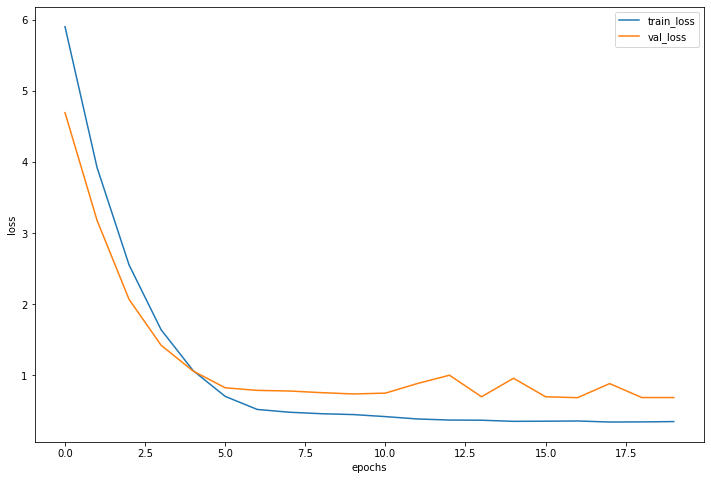

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

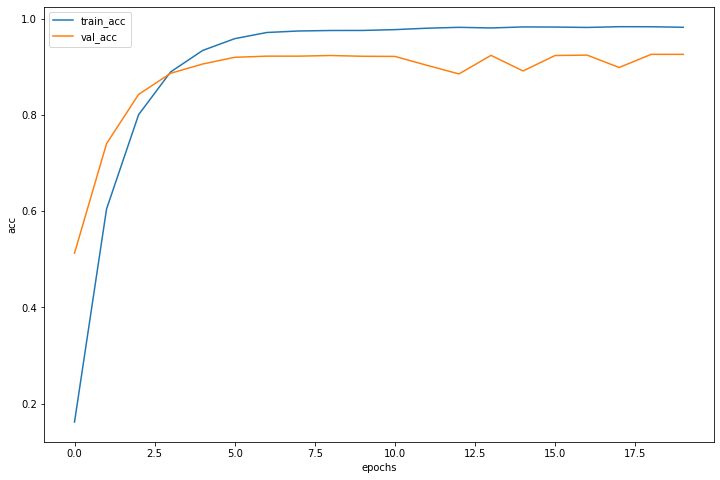

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
# сохранить веса нашей нейросети model
torch.save(model.state_dict(), '/content/drive/MyDrive/my_model_weights1.pth')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# загрузить веса нашей нейросети my_model
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model_weights1.pth'))

<All keys matched successfully>

In [ ]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', float(test_acc))

test loss = 0.7346178047222842
test accuracy = 0.9224952741020794


**Cosine similarity calculation**: drop a last layer of trained network. Get embeddings for some images from train set and for images from test set. Calculate cosine similarities between embeddings corresponding to the pictures of the same person and different people. Is the difference big in any of cases?

In [ ]:
 #drop a last layer of trained network
 model.logits = torch.nn.Identity()

In [ ]:
model

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [ ]:
#Get embeddings for all images from train set and for images from test set.
classes_train = []
embeddings_train = []
model.eval()
with torch.no_grad():
    for xb, yb in train_loader:
        xb = xb.to(device)
        b_embeddings = model(xb)
        b_embeddings = b_embeddings.to('cpu').numpy()
        classes_train.extend(yb.numpy())
        embeddings_train.extend(b_embeddings)


classes_test = []
embeddings_test = []
model.eval()
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        b_embeddings = model(xb)
        b_embeddings = b_embeddings.to('cpu').numpy()
        classes_test.extend(yb.numpy())
        embeddings_test.extend(b_embeddings)

In [ ]:
embeddings_train_dict = {k: [] for k in classes_train}
for p in zip(classes_train, embeddings_train):
  embeddings_train_dict[p[0]].append(p[1])
  
embeddings_test_dict = {k: [] for k in classes_train}
for p in zip(classes_test, embeddings_test):
  embeddings_test_dict[p[0]].append(p[1])

In [ ]:
#Calculate cosine similarities between embeddings corresponding to the pictures of the same person and different people. 
#cosine similarity on train

cos_sim_positive_train = []
cos_sim_negative_train = []

# Using PyTorch Cosine Similarity
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
# N = number of classes
N = 100
for i in range(N):  
  M = len(embeddings_train_dict[i])
  
  #positive pairs
  for j in range(M):
    for k in range(M):
      cos_sim_positive_train.append(cos(torch.from_numpy(embeddings_train_dict[i][j]), torch.from_numpy(embeddings_train_dict[i][k])))
  
  #negative pairs
  for j in range(M):
    for n in range(N):
      if n != i:
        cos_sim_negative_train.append(cos(torch.from_numpy(embeddings_train_dict[i][j]), torch.from_numpy(embeddings_train_dict[n][0])))

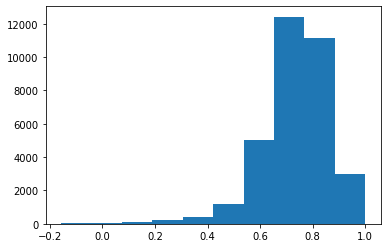

In [ ]:
plt.hist(cos_sim_positive_train);

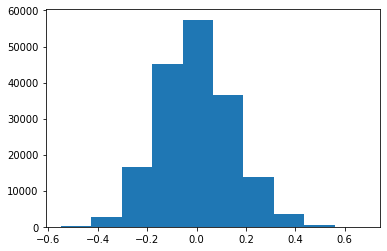

In [ ]:
plt.hist(cos_sim_negative_train);

In [ ]:
#Calculate cosine similarities between embeddings corresponding to the pictures of the same person and different people. 
#cosine similarity on test

cos_sim_positive_test = []
cos_sim_negative_test = []

# Using PyTorch Cosine Similarity
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
# N = number of classes
N = 100
for i in range(N):  
  M = len(embeddings_test_dict[i])
  
  #positive pairs
  for j in range(M):
    for k in range(M):
      cos_sim_positive_test.append(cos(torch.from_numpy(embeddings_test_dict[i][j]), torch.from_numpy(embeddings_test_dict[i][k])))
  
  #negative pairs
  for j in range(M):
    for n in range(N):
      if (n != i) and (n != 20):
        cos_sim_negative_test.append(cos(torch.from_numpy(embeddings_test_dict[i][j]), torch.from_numpy(embeddings_test_dict[n][0])))

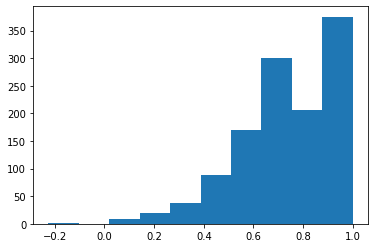

In [ ]:
plt.hist(cos_sim_positive_test);

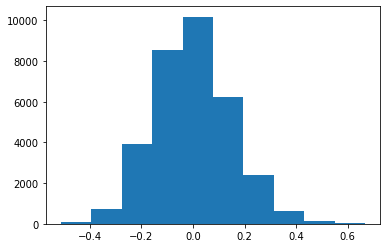

In [ ]:
plt.hist(cos_sim_negative_test);

**Вывод:**

Гистограммы наглядно отображают, что косинусные расстояния для эмбеддингов изображений, принадлежащих одному человеку в основном лежат в пределах от 0.6 до 1. Для изображений разных людей этот коэффициент чаще всего принимает значения от -0.2 до 0.2.

Эти данные верны для изображений как внутри тренировочной выборки, так и внутри тестовой.

**Cosine similarity distribution**: calculate all the cosine similarities between images in test dataset and train dataset of the same person. This means if you have image of person #106 in test dataset, calculate all similarities between this person's embeddings from test dataset and this person's embeddings from train dataset. 

Then also do that for pairs of different people. This means if you have image of person #106 in test dataset, calculate similarities between this person's embeddings from test dataset and other people embeddings from train dataset. 

This calculation may take a long time and memory since it's a lot of pairs. You can cut the number of pairs which you calculate distances between up to 5k, as an example.

In [ ]:
#calculate all the cosine similarities between images in test dataset and train dataset of the same person. 

cos_sim_positive = []
cos_sim_negative = []

# Using PyTorch Cosine Similarity
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
# N = number of classes
N = 100
for i in range(N):  
  M_test = len(embeddings_test_dict[i])
  M_train = len(embeddings_train_dict[i])
  #positive pairs
  for j in range(M_test):
    for k in range(M_train):
      cos_sim_positive.append(cos(torch.from_numpy(embeddings_test_dict[i][j]), torch.from_numpy(embeddings_train_dict[i][k])))
  
  #negative pairs
  for j in range(M_test):
    for n in range(N):
      if n != i:
        cos_sim_negative.append(cos(torch.from_numpy(embeddings_test_dict[i][j]), torch.from_numpy(embeddings_train_dict[n][0])))

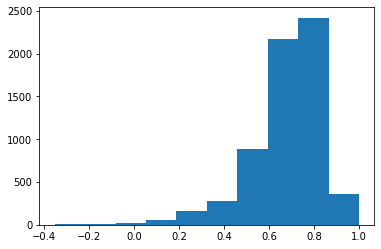

In [ ]:
plt.hist(cos_sim_positive);

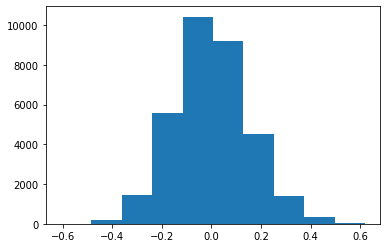

In [ ]:
plt.hist(cos_sim_negative);

**Вывод:**

Для изображений, взятых из разных выборок (тестовой и тренировочной), данные получились аналогичными, как и при подсчете внутри одной выборки. 

Они по-прежнему отображают, что для эмбеддингов, полученных обученной нами нейросетью, для одинаковых людей косинусные расстояния ближе к 1, а для разных людей - около 0.

**Для интереса:**

Сравним косинусные расстояния для эмбеддингов, полученной нашей обученной сетью и сетью, которую мы использовали при fine tuning (inception_resnet_v1 pretrained on VGGFace2)

In [ ]:
model_resnet = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)
model_resnet.to(device)
#drop a last layer of network
model_resnet.logits = torch.nn.Identity()

In [ ]:
#model_resnet pretrained!!!
#Get embeddings for images from train set and for images from test set.
classes_train = []
embeddings_train = []
model_resnet.eval()
with torch.no_grad():
    for xb, yb in train_loader:
        xb = xb.to(device)
        b_embeddings = model_resnet(xb)
        b_embeddings = b_embeddings.to('cpu').numpy()
        classes_train.extend(yb.numpy())
        embeddings_train.extend(b_embeddings)


classes_test = []
embeddings_test = []
model_resnet.eval()
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        b_embeddings = model_resnet(xb)
        b_embeddings = b_embeddings.to('cpu').numpy()
        classes_test.extend(yb.numpy())
        embeddings_test.extend(b_embeddings)

embeddings_train_dict = {k: [] for k in classes_train}
for p in zip(classes_train, embeddings_train):
  embeddings_train_dict[p[0]].append(p[1])
  
embeddings_test_dict = {k: [] for k in classes_train}
for p in zip(classes_test, embeddings_test):
  embeddings_test_dict[p[0]].append(p[1])

In [ ]:
#model_resnet pretrained!!!
#calculate all the cosine similarities between images in test dataset and train dataset of the same person. 

cos_sim_positive = []
cos_sim_negative = []

# Using PyTorch Cosine Similarity
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
# N = number of classes
N = 100
for i in range(N):  
  M_test = len(embeddings_test_dict[i])
  M_train = len(embeddings_train_dict[i])
  #positive pairs
  for j in range(M_test):
    for k in range(M_train):
      cos_sim_positive.append(cos(torch.from_numpy(embeddings_test_dict[i][j]), torch.from_numpy(embeddings_train_dict[i][k])))
  
  #negative pairs
  for j in range(M_test):
    for n in range(N):
      if n != i:
        cos_sim_negative.append(cos(torch.from_numpy(embeddings_test_dict[i][j]), torch.from_numpy(embeddings_train_dict[n][0])))

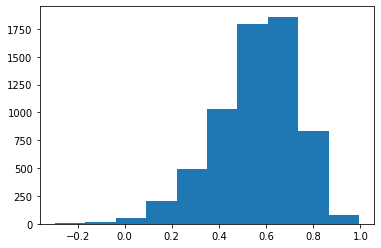

In [ ]:
#model_resnet pretrained!!!
plt.hist(cos_sim_positive);

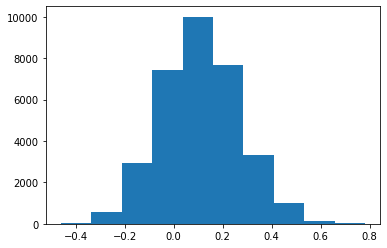

In [ ]:
#model_resnet pretrained!!!
plt.hist(cos_sim_negative);

**Для Интереса. Вывод.**

Как видно по гистограммам, если мы получаем эмбеддинги изображений из исходной сети, которую мы использовали при fine tuning нашей нейросети, то данные будут хуже.

Видно, что косинусные расстояния для эмбеддингов изображений, принадлежащих одному человеку смещаются влево и принадлежат от 0.4 до 0.8 (для нашей обученной сети от 0.6 до 1). Для изображений разных людей этот коэффициент наоборот, смещается вправо и принадлежит от 0 до 0.2 (для нашей обученной сети от -0.2 до 0.2). 

Таким образом, если использовать сеть "из коробки" без дообучения, то классы будут уже не так хорошо разделены.

## Task 2 (20% points): Identificaton rate metric

When training the model above we used CE loss on val and test set as a measure of performance of our model. But this has a major disadvantage: we can't measure how godd a model would work on unseen faces (which are not present in training, val & test sets)

To address this we can calculate another metric for the model: **identification rate**. This is how it works:

We have two sets of faces: query and distractors. None of the faces from those sets are present in train, val or test sets.

1. calculate cosine similarities between all the faces corresponding to the same people from query dataset. This means if the person has 3 photos in query part: 01.jpg, 02.jpg, 03.jpg, then calculate 3 cosine similarities between every pair of embeddings corresponding to those photos. 
2. calculate cosine similarities between all the faces corresponding to the different people from query dataset. 
3. calculate cosine similarities between all the pairs of embeddings corresponding to query and distractors. This means calculate similarities between pairs (q, d), where q is the embedding that corresponds to a face from query, d — embedding that corresponds to a face from distractors. You'll get |query|*|distractors| similarities.
4. Sum numbers of similarities from 2 and 3 stages. This is a number of false pairs.
5. fix **FPR** (false positive rate). Let it be 0.01 in our case. FPR multiplied by a number of false pairs from the stage 4 is the number of false positives we would allow our model to make. Let's call this number N
6. Sort all the similarities of false pairs by descending order. Get the Nth element from the beginning — that's our **threshold similarity**.
7. Calculate how many positive similarities from stage 1 are equal or more that threshold. Divide this number by whole number of positive similarities from stage 1. This is TPR (true positive rate) — our metric.

This metric can also be expressed as TPR@FPR=0.01. FPR can vary. 

Datasets (query photos, query labels & distructors photos) you can download from here: https://disk.yandex.ru/d/C54mClLmQkag6Q

**Task**: implement the TPR@FPR metric. Calculate it for your model and test dataset on FPR=[0.5, 0.2, 0.1, 0.05].

There're some functions pre-defined and some tests given for better understanding. Please don't change the functions prototypes, so that you can use asserts for checking.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip /content/drive/MyDrive/celebA_ir.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: celebA_ir/celebA_query/001212.jpg  
  inflating: celebA_ir/celebA_query/103377.jpg  
  inflating: celebA_ir/celebA_query/107111.jpg  
  inflating: celebA_ir/celebA_query/075593.jpg  
  inflating: celebA_ir/celebA_query/053232.jpg  
  inflating: celebA_ir/celebA_query/083205.jpg  
  inflating: celebA_ir/celebA_query/069804.jpg  
  inflating: celebA_ir/celebA_query/001204.jpg  
  inflating: celebA_ir/celebA_query/097500.jpg  
  inflating: celebA_ir/celebA_query/075585.jpg  
  inflating: celebA_ir/celebA_query/117314.jpg  
  inflating: celebA_ir/celebA_query/105076.jpg  
  inflating: celebA_ir/celebA_query/011771.jpg  
  inflating: celebA_ir/celebA_query/047523.jpg  
  inflating: celebA_ir/celebA_query/084568.jpg  
  inflating: celebA_ir/celebA_query/076926.jpg  
  inflating: celebA_ir/celebA_query/069806.jpg  
  inflating: celebA_ir/celebA_query/115271.jpg  
  inflating: celebA_ir/celebA_query/160836.jpg  
 

In [4]:
from collections import defaultdict

# file with query part annotations: which image belongs to which class
# format: 
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.txt', 'r')
query_lines = f.readlines()
f.close()
query_lines = [x.strip().split() for x in query_lines]
# plain list of image names from query. Neede to compute embeddings for query
query_img_names = [x[0] for x in query_lines]

# dictionary with info of which images from query belong to which class
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
  query_dict[img_class].append(img_name)

# list of distractor images
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors') 

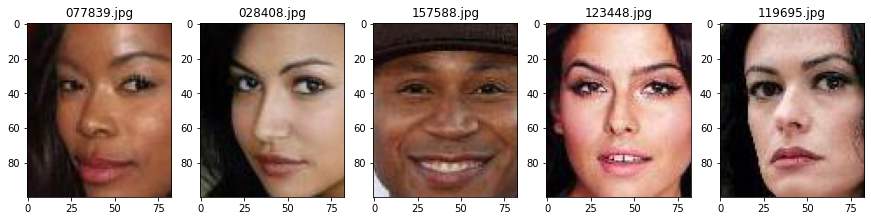

In [ ]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_ir/celebA_query/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

images_names = os.listdir('./celebA_ir/celebA_query/')[:5]
show_imgs(images_names)

In [ ]:
def get_imgs(images_names):

    if images_names == query_img_names:
      path = 'celebA_ir/celebA_query/'
    elif images_names == distractors_img_names:
      path = 'celebA_ir/celebA_distractors/'
    else:
      print('error')

    imgs = []
    for img in images_names:
      img = Image.open(os.path.join(path, img))
      img = np.array(img)
      img = np.swapaxes(img,0,2)
      img = torch.FloatTensor(img).unsqueeze(0)
      #print(img.shape)
      imgs.append(img)

    return imgs

In [ ]:
def compute_embeddings(model, images_list):
  '''
  compute embeddings from the trained model for list of images.
  params:
    model: trained nn model that takes images and outputs embeddings
    images_list: list of images paths to compute embeddings for
  output:
    list: list of model embeddings. Each embedding corresponds to images 
          names from images_list
  '''
  # YOUR CODE HERE
  #Get embeddings for images from images_list.
  embeddings = []
  model.eval()

  imgs = get_imgs(images_list)

  with torch.no_grad():
      for img in imgs:
          img = img.to(device)
          b_embeddings = model(img)
          b_embeddings = b_embeddings.to('cpu').numpy()
          embeddings.extend(b_embeddings)

  return embeddings

In [ ]:
query_embeddings = compute_embeddings(model, query_img_names)
distractors_embeddings = compute_embeddings(model, distractors_img_names)

#torch.Size([64, 3, 195, 160])

In [ ]:
torch.save(query_embeddings, '/content/drive/MyDrive/query_embeddings.pt')
torch.save(distractors_embeddings, '/content/drive/MyDrive/distractors_embeddings.pt')

In [60]:
query_embeddings = torch.load('/content/drive/MyDrive/query_embeddings.pt')
distractors_embeddings = torch.load('/content/drive/MyDrive/distractors_embeddings.pt')

In [ ]:
print(len(query_embeddings))
print(len(distractors_embeddings))

7198
23397


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [ ]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
  '''
  compute cosine similarities between positive pairs from query (stage 1)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to the same people from query list
  '''
  # YOUR CODE HERE
  cosine_query_pos = []

  cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)

  query_embeddings = torch.FloatTensor(query_embeddings).to(device)

  for query_class in query_dict.keys():  #loop by all query classes
    
    indices = [] #list of indices of all query imgs of the same class

    for img_name in query_dict[query_class]:  #loop by all query imgs of the same class
        indices.append(query_img_names.index(img_name))
    
    for i in indices:
      for j in indices:
        if i < j:
          cos_sim = cos(query_embeddings[i], query_embeddings[j])
          cosine_query_pos.append(cos_sim.to('cpu'))

  return cosine_query_pos

def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
  '''
  compute cosine similarities between negative pairs from query (stage 2)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to different people from query list
  '''
  cosine_query_neg = []

  cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)

  query_embeddings = torch.FloatTensor(query_embeddings).to(device)
  
  num_classes = len(query_dict.keys())

  for en, query_class in enumerate(query_dict.keys()):  #loop by all query classes

    print(en+1, '/', num_classes)

    indices_same = [] #list of indices of all query imgs of the same class
    for img_name in query_dict[query_class]:  #loop by all query imgs of the same class
        indices_same.append(query_img_names.index(img_name))
    
    for i in indices_same:
      for j in range(i, len(query_img_names)):
        if j not in indices_same:
          cos_sim = cos(query_embeddings[i], query_embeddings[j])
          cosine_query_neg.append(cos_sim.to('cpu'))
          del cos_sim

  return cosine_query_neg

def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
  '''
  compute cosine similarities between negative pairs from query and distractors
  (stage 3)
  params:
    query_embeddings: list of embeddings corresponding to query_img_names
    distractors_embeddings: list of embeddings corresponding to distractors_img_names
  output:
    list of floats: similarities between pairs of people (q, d), where q is 
                    embedding corresponding to photo from query, d —
                    embedding corresponding to photo from distractors
  '''
  cosine_query_distractors = []
  cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
  query_embeddings = torch.FloatTensor(query_embeddings).to(device)
  distractors_embeddings = torch.FloatTensor(distractors_embeddings).to(device)

  for query_emb in query_embeddings:
    for dis_emb in distractors_embeddings:
      cos_sim = cos(query_emb, dis_emb)
      cosine_query_distractors.append(cos_sim.to('cpu'))
      del cos_sim

  return cosine_query_distractors

In [ ]:
#writing in file
def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
  '''
  compute cosine similarities between negative pairs from query (stage 2)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to different people from query list
  '''

  cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
  query_embeddings = torch.FloatTensor(query_embeddings).to(device)
  
  num_classes = len(query_dict.keys())

  f = open('/content/drive/MyDrive/cosine_query_neg.txt', 'w')

  for en, query_class in enumerate(query_dict.keys()):  #loop by all query classes

    print(en+1, '/', num_classes)

    indices_same = [] #list of indices of all query imgs of the same class
    for img_name in query_dict[query_class]:  #loop by all query imgs of the same class
        indices_same.append(query_img_names.index(img_name))
    
    for i in indices_same:
      for j in range(i, len(query_img_names)):
        if j not in indices_same:
          cos_sim = cos(query_embeddings[i], query_embeddings[j])
          f.write(str(cos_sim.to('cpu').item()) + '\n')
          del cos_sim
  
  f.close()
  return

In [ ]:
#writing in file
def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
  '''
  compute cosine similarities between negative pairs from query and distractors
  (stage 3)
  params:
    query_embeddings: list of embeddings corresponding to query_img_names
    distractors_embeddings: list of embeddings corresponding to distractors_img_names
  output:
    list of floats: similarities between pairs of people (q, d), where q is 
                    embedding corresponding to photo from query, d —
                    embedding corresponding to photo from distractors
  '''
  
  cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
  query_embeddings = torch.FloatTensor(query_embeddings).to(device)
  distractors_embeddings = torch.FloatTensor(distractors_embeddings).to(device)

  f = open('/content/drive/MyDrive/cosine_query_dis.txt', 'w')
  
  for query_emb in query_embeddings:
    for dis_emb in distractors_embeddings:
      cos_sim = cos(query_emb, dis_emb)
      f.write(str(cos_sim.to('cpu').item()) + '\n')
      del cos_sim

  f.close()
  return 

In [ ]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, 
                                            query_embeddings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


In [ ]:
torch.save(cosine_query_pos, '/content/drive/MyDrive/cosine_query_pos.pt')

In [ ]:
cosine_query_pos = torch.load('/content/drive/MyDrive/cosine_query_pos.pt')

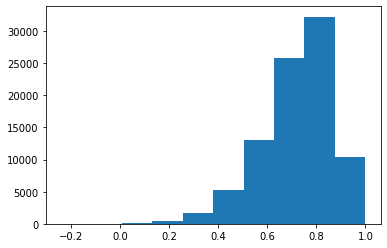

In [ ]:
plt.hist(cosine_query_pos);

In [ ]:
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, 
                                            query_embeddings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  from ipykernel import kernelapp as app


1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300
111 / 30

In [ ]:
f = open('/content/drive/MyDrive/cosine_query_neg.txt', 'r')

cosine_query_neg = []
for line in f:
  cosine_query_neg.append(float(line))

f.close()

In [ ]:
len(cosine_query_neg)

25813051

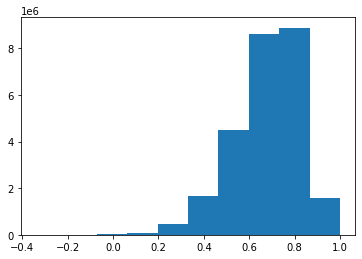

In [ ]:
plt.hist(cosine_query_neg);

In [ ]:
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, 
                                                            distractors_embeddings)


In [ ]:
f = open('/content/drive/MyDrive/cosine_query_dis.txt', 'r')

cosine_query_distractors = []
for line in f:
  cosine_query_distractors.append(float(line))

f.close()

In [ ]:
len(cosine_query_distractors)

168411606

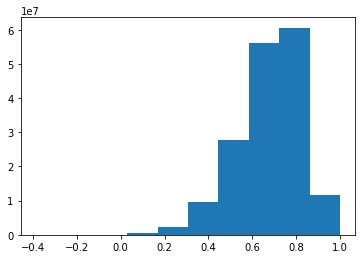

In [ ]:
plt.hist(cosine_query_distractors);

Check you code of functions which compute similarities:

In [ ]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                            test_query_embeddings)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

1 / 3
2 / 3
3 / 3


In [ ]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

Implement the final function: identification rate calculation

In [ ]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, 
               fpr=0.1):
  '''
  compute identification rate using precomputer cosine similarities between pairs
  at given fpr
  params:
    cosine_query_pos: cosine similarities between positive pairs from query
    cosine_query_neg: cosine similarities between negative pairs from query
    cosine_query_distractors: cosine similarities between negative pairs 
                              from query and distractors
    fpr: false positive rate at which to compute TPR
  output: 
    float: threshold for given fpr 
    float: TPR at given FPR
  '''
  # YOUR CODE HERE
  number_of_false_pairs = len(cosine_query_neg) + len(cosine_query_distractors)
  number_of_false_pos = round(fpr * number_of_false_pairs)
  sim_of_false_pairs = sorted(cosine_query_neg + cosine_query_distractors, reverse=True)
  threshold = sim_of_false_pairs[number_of_false_pos]
  tpr = len(list(filter(lambda x: x >= threshold, cosine_query_pos))) / len(cosine_query_pos)

  return threshold, tpr

Check yourself:

In [ ]:
thr = []
tpr = []
for fpr in [0.5, 0.3, 0.1]:
  x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, 
                    test_cosine_query_distractors, fpr=fpr)
  thr.append(x)
  tpr.append(y)

In [ ]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(tpr), np.array(true_tpr)), "A mistake in computing tpr"

Finally compute tpr for faces query and distractors dataset and fpr = [0.5, 0.2, 0.1, 0.05]:

In [ ]:
thr = []
tpr = []
for fpr in [0.5, 0.2, 0.1, 0.05]:
  x, y = compute_ir(cosine_query_pos, cosine_query_neg, 
                    cosine_query_distractors, fpr=fpr)
  print('fpr =', fpr)
  print('treshold =', x)
  print('tpr =', y)
  thr.append(x)
  tpr.append(y)

fpr = 0.5
treshold = 0.697831928730011
tpr = 0.622560482057739
fpr = 0.2
treshold = 0.8023597598075867
tpr = 0.32234238690529726
fpr = 0.1
treshold = 0.8445188999176025
tpr = 0.19830920046766795
fpr = 0.05
treshold = 0.8735224604606628
tpr = 0.12099784153251192


In [ ]:
# построим график true positive rate/false positive rate and threshold/false positive rate
def plot_trainig(fpr, tpr, thr):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr, '-ro')
    plt.title('Identification rate metric')

    plt.subplot(1, 2, 2)
    plt.xlabel('false positive rate')
    plt.ylabel('threshold')
    plt.plot(fpr, thr, '-bo')
    plt.title('Threshold')

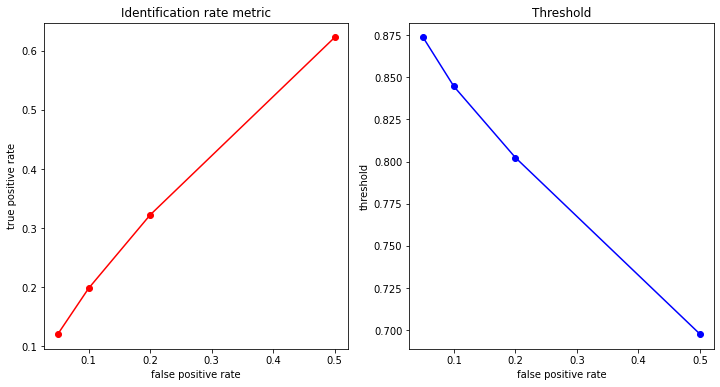

In [ ]:
fpr = [0.5, 0.2, 0.1, 0.05]
plot_trainig(fpr, tpr, thr)

**Вывод:**

Using identification rate metric we measure how good a model would work on unseen faces (which are not present in training, val & test sets)

We calculate identification rate metric for the model on FPR=[0.5, 0.2, 0.1, 0.05]


## Task 3 (50% points): Loss functions

Building a network on task 1 we used an ordinary CE loss. But there are many more variants of loss functions that can be used to train neural network. We will discuss two of them, which are the most popular. More examples of losses for face recognition and their performance reviews you can find in this paper: https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss (25% points)

This is another kind of loss which does not require a model to have last classification layer — it works directly with embeddings. It requires by design to make embeddings of one person be close on embeddings space and embeddings of different people be far away from each other. 

This loss has an advantage over CE-like losses: it does not rely on number of classes in dataset. If we have new faces of new people in a dataset, we won't need to completely retrain the network, we could just fine-tune the trained network on new photos.


**How TripletLoss works**:

Here the architecture of neural network will be slightly different than it was when we used CE loss: it won't have the last classification layer. The last layer of NN will output embeddings of the given photo. 

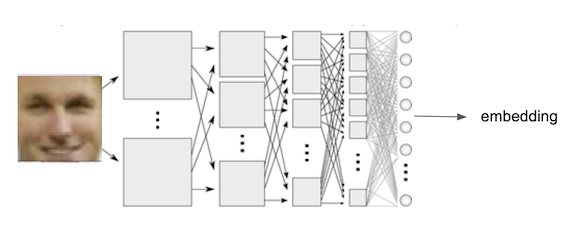

The TripletLoss function works directly with these embeddings. The idea of it is to make embeddings of the same people more close, compact in the embedding space, and the embeddings of the different people be more separate. There's a formula for the loss:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

where 
- $e$ is embedding of a photo (output of a model)
- $p$ is a positive embedding for the photo (embedding that we want $e$ be close to)
- $n$ is a negative embedding for the photo (embedding that we want $e$ be far from)
- $d(x, y)$ is a distance measure between embeddings 
- margin — a positive margin to further boost the difference between $d(a, p)$ and $d(a, n)$

**All the embeddings $e$, $p$ and $n$ must be normalized before passing them to the loss**.

In our case for the given photo $E$ and it's embedding $e$ positive embedding $p$ must be an embedding of the photo of the same person and embedding $n$ must be an ambedding of the photo of the different person.

This emplementation of TripletLoss for PyTorch can be found [here](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). There are different variants of TripletLoss which can also boost performance and which you can implement by yourself, if you want:
- use more that 1 sample of $p$ and $n$ for one embedding $e$ 
- use special kinds of negatives: e.g. the negatives that are the most close to e (to boost them be further away from e)


**More to read about TripletLoss**:

The idea of TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch implementation of TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Task**: implement a model and train it with TripletLoss. Play with margin parameter to achieve better results.

Which loss among which you have tried is the best?

**To get the full mark for this task you need to train a model using  TripletLoss correctly at least for one value of margin and achieve >=75% acc on test set.** 
As we don't have a classification layer in our network, we need a custom procedure for accuracy calculation. You can use one of the following procedures:
- calculate accuracy on val and test sets using KNN with embeddings from training set as training points. (easy way)
- compute mean embeddings for every class from training set and use them as reference embeddings. Then for every embedding v from val and test sets calculate cosine similarities between v and mean embeddings from train set. (the more "right" way, but requires code writing)

You can use any of those two variants.

**Hints**:
- think of what the distance function $d$ should be in our case: training a model we want it to output embeddings which can be compared using cosine similarity function. Pay attention to that cosine similarity is not a distance measure — the more cosine distance, the closer embeddings are. Think how you can put cosine distance into TripletLoss function.
- to train model using this loss you'll need to rewrite the Dataset class so it gives you not the random image and its label, but the image, positive images and negative images for this image;
- don't forget to normalize embeddings for the loss! You may even do that by adding batchnorm/layernorm to the last layer of your network

In [ ]:
# this link won't work for you, if you want to generate working link, 
# visit 500 classes https://askubuntu.com/questions/1188381/how-to-get-link-of-file-to-download-with-wget
# 1000 classes https://disk.yandex.ru/d/FVFucEDrZaxI9g
# or download the data and place it to folder manually
! wget "https://s765sas.storage.yandex.net/rdisk/04528bf70ac1397a24a6cce82b0e68b1eb8856bd614291d024d335b14eac51af/6203bbea/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid=182045977&filename=celebA_train_1k.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=182045977&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2&etag=0e9fb41a19ad84f907bc167bbc55bb03&rtoken=Qp5KT9bYnCzM&force_default=yes&ycrid=na-b448c9b0ca06394117f7672845f2369e-downloader11f&ts=5d7957a174e80&s=2e02a4d26138b8c6639ba1d17edb99064d8ad3de57e2386dea53132627a2b56f&pb=U2FsdGVkX18kgS16khQeB_6t3MRr7IT2FQvj2GqPIH1b-AIuYMwMdsB7D2paRHKo3NapleM3EvFH4T1HQ0P3iA-js-1K-XKKN_ifU7xFJaM" -O celebA.zip
! unzip celebA.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: celebA_train_1k/celebA_imgs/049159.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._049159.jpg  
  inflating: celebA_train_1k/celebA_imgs/105435.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._105435.jpg  
  inflating: celebA_train_1k/celebA_imgs/068197.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._068197.jpg  
  inflating: celebA_train_1k/celebA_imgs/092985.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._092985.jpg  
  inflating: celebA_train_1k/celebA_imgs/057367.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._057367.jpg  
  inflating: celebA_train_1k/celebA_imgs/097625.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._097625.jpg  
  inflating: celebA_train_1k/celebA_imgs/157415.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._157415.jpg  
  inflating: celebA_train_1k/celebA_imgs/131790.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform
from tqdm.autonotebook import tqdm, trange

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

import torch.optim as optim
from torch.optim import lr_scheduler

import time
import random

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [51]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)


class celebADataset(Dataset):
    """Rewrited dataset. Return anchor with positive and negative images, class number"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx] #class name

        image = Image.open(img_name) #image

        same_indices = []
        for i in range(len(self.labels)):
          if self.labels[i] == label:
            same_indices.append(i)
        positive_index = random.choice(same_indices)
        positive_image_name = self.images[positive_index]
        positive_image = Image.open(positive_image_name) # positive image

        
        different_indices = []
        for i in range(len(self.labels)):
          if self.labels[i] != label:
            different_indices.append(i)
        negative_index = random.choice(different_indices)
        negative_image_name = self.images[negative_index]
        negative_image = Image.open(negative_image_name)
        
        sample = [image, positive_image, negative_image, int(label)]

        sample[0] = self.transform(sample[0])
        sample[1] = self.transform(sample[1])
        sample[2] = self.transform(sample[2])

        return sample

In [52]:
train_transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      #transforms.RandomHorizontalFlip(), # нужно для Data Augmentation (добавляем в обучающий датасет картинки, отраженные по горизонтали)
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_data = celebADataset('train', train_transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# choose your own batch_size
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [53]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

fatal: destination path 'facenet-pytorch' already exists and is not an empty directory.
mv: cannot stat 'facenet-pytorch/models': No such file or directory


In [54]:
from models import inception_resnet_v1

# берем готовую модель и заменяем классификатор на Linear(in_features=512, out_features=1000, bias=True)
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)

In [55]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [56]:
model.to(device);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
# загрузить веса нашей нейросети my_model
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model_weights1.pth'))

<All keys matched successfully>

In [58]:
#drop a last layer of trained network
model.logits = torch.nn.Identity()

In [59]:
# fine-tune the model on train set and evaluate it on test set
#margin=1.0

#Unfreeze N last layers
for param in model.block8.parameters():
    param.requires_grad = True 
for param in model.last_linear.parameters():
    param.requires_grad = True 
for param in model.last_bn.parameters():
    param.requires_grad = True 
for param in model.logits.parameters():
    param.requires_grad = True 

# В качестве cost function используем TripletLoss
# определим distance_function для TripletLoss = lambda x, y: 1.0 - cos(x, y)
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
loss_fn = torch.nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - cos(x, y), margin=1.0, reduction='mean')

# Обучаем Unfreeze layers
optimizer = optim.Adam(list(model.block8.parameters())+list(model.last_linear.parameters())+list(model.last_bn.parameters())+list(model.logits.parameters()), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
#count mean embedding for every class from training set
def mean_emb_count():
  model.eval()
  
  mean_emb = torch.Tensor().to(device)
  embeddings = torch.Tensor().to(device)
  labels = []

  with torch.no_grad():
    for img, _, _, label in train_loader: #batch
      img = img.to(device)
      embedding = model(img) # get batch of embeddings, tensor on cuda
      img = img.cpu()
      
      embeddings = torch.cat((embeddings, embedding), 0)
      labels.extend(label)

  N = 1000 #кол-во классов
  counts = [None]*N
  for embedding, label in zip(embeddings, labels):
    if counts[label] == None:
      counts[label] = [embedding, 1]
    else:
      counts[label][0] += embedding
      counts[label][1] += 1
  for sum_emb, count in counts:
    mean_emb = torch.cat((mean_emb, torch.unsqueeze(sum_emb / count, dim=0)), 0)

  embeddings.cpu()

  return mean_emb

In [ ]:
# оценка модели на одной эпохе
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0
    all_valid_embeddings = []
    cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6).to(device)

    mean_emb = mean_emb_count()

    # итерируемся по батчам
    for anchor, positive, negative, label in val_loader:
        anchor = anchor.to(device)
        positive = positive.to(device)
        negative = negative.to(device)
        label = label.to(device)

        with torch.set_grad_enabled(False):
            anchor_emb = model(anchor)
            positive_emb = model(positive)
            negative_emb = model(negative)
        
            loss = criterion(anchor_emb, positive_emb, negative_emb)

            preds = [] # вектор соответствия эмбеддингов классу (макс косин схожесть)
            for a_item in anchor_emb: # цикл по всем изображениям батча
              r_a = a_item.repeat(1000, 1) # [len(batch of anchor_emb), num_classes]
              cs_item = cos(r_a, mean_emb)  # вектор косинусных схожеств
              pred_item = torch.argmax(cs_item, 0)
              preds.append(pred_item.item())
        
        running_loss += loss.item() * anchor.size(0)
        processed_size += anchor.size(0) # number of imgs
        running_corrects += torch.sum(torch.FloatTensor(preds).to(device) == label.data)

        anchor_emb = anchor_emb.cpu()
        positive_emb = positive_emb.cpu()
        negative_emb = negative_emb.cpu()
        anchor = anchor.cpu()
        positive = positive.cpu()
        negative = negative.cpu()
                  
    val_loss = running_loss / processed_size
    val_acc = (running_corrects.double() / processed_size).cpu().item()
    
    return val_loss, val_acc

In [ ]:
# обучение модели на одной эпохе
def fit_epoch(model, train_loader, criterion, optimizer):
    model.train(True)
    
    running_loss = 0.0
    processed_data = 0
  
    # итерируемся по батчам
    for anchor, positive, negative, _ in train_loader:
        anchor = anchor.to(device)
        positive = positive.to(device)
        negative = negative.to(device)
        
        optimizer.zero_grad() # обнуляем градиенты

         # получаем эмбеддинги
        anchor_emb = model(anchor)
        positive_emb = model(positive)
        negative_emb = model(negative)
        
        loss = criterion(anchor_emb, positive_emb, negative_emb) # считаем ф-ю потерь
        loss.backward() # вычисление градиентов (backpropagation)
        optimizer.step() # изменение весов модеели
        
        # статистика
        running_loss += loss.item() * anchor.size(0)
        processed_data += anchor.size(0)

        anchor = anchor.cpu()
        positive = positive.cpu()
        negative = negative.cpu()
        anchor_emb = anchor_emb.cpu()
        positive_emb = positive_emb.cpu()
        negative_emb = negative_emb.cpu()
              
    train_loss = running_loss / processed_data # считаем loss по эпохе
    
    return train_loss

In [ ]:
def train_model(model, criterion, opt, scheduler, epochs=25):

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:

        for epoch in range(epochs):
            scheduler.step()
            print('train epoch', epoch+1)
            train_loss = fit_epoch(model, train_loader, criterion, opt)
            print('train loss', train_loss)
            
            print('eval epoch', epoch+1)
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            print('val loss', val_loss)
            print('val accuracy', val_acc)
            history.append((train_loss, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, v_acc=val_acc))
    
    return history

In [ ]:
# обучение модели
num_epochs=10
history = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train epoch 0
train loss 0.1359018463663707
eval epoch 0
val loss 0.06152800930069652
val accuracy 0.8503747323340471

Epoch 001 train_loss: 0.0000     val_loss 0.0615 val_acc 0.8504
train epoch 1
train loss 0.06290798703863848
eval epoch 1
val loss 0.04654309417597742
val accuracy 0.8573340471092078

Epoch 002 train_loss: 0.0000     val_loss 0.0465 val_acc 0.8573
train epoch 2
train loss 0.06403594230418544
eval epoch 2
val loss 0.060048608827291
val accuracy 0.8664346895074947

Epoch 003 train_loss: 0.0000     val_loss 0.0600 val_acc 0.8664
train epoch 3
train loss 0.06285619777479157
eval epoch 3
val loss 0.0829670046769258
val accuracy 0.8632226980728052

Epoch 004 train_loss: 0.0000     val_loss 0.0830 val_acc 0.8632
train epoch 4
train loss 0.060645647142648744
eval epoch 4
val loss 0.06896174608104577
val accuracy 0.8808886509635975

Epoch 005 train_loss: 0.0000     val_loss 0.0690 val_acc 0.8809
train epoch 5
train loss 0.056768965005370875
eval epoch 5
val loss 0.0561021061462

In [ ]:
loss, val_loss, val_acc = zip(*history)

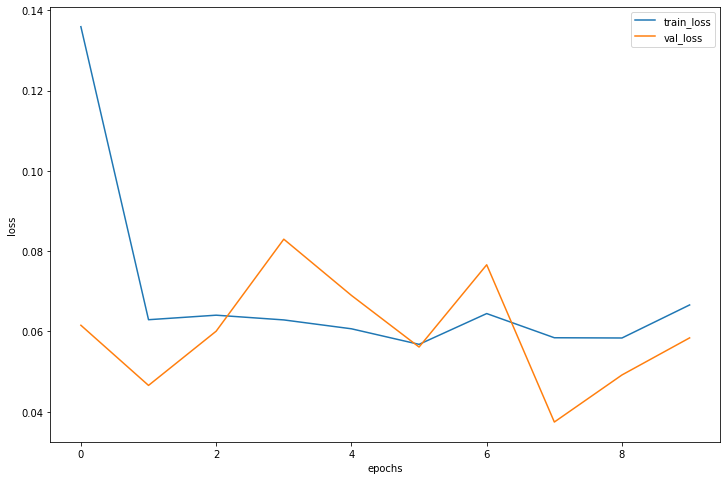

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

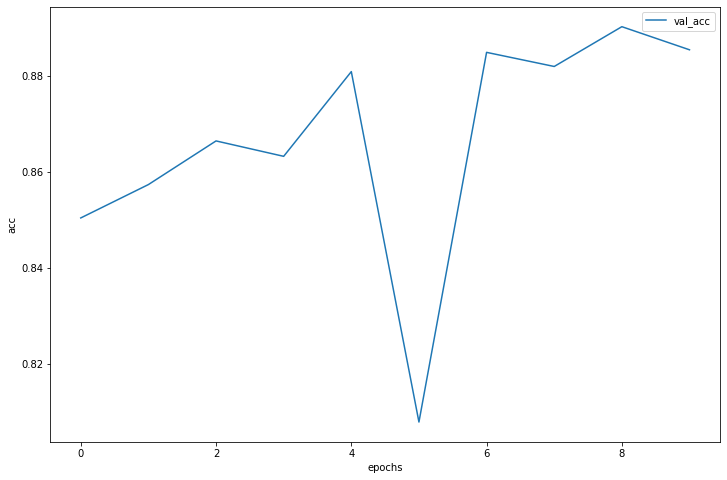

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
# сохранить веса нашей нейросети model
torch.save(model.state_dict(), '/content/drive/MyDrive/my_model_weights_triplet_loss.pth')

In [ ]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', test_acc)

test loss = 0.06466911100062396
test accuracy = 0.8654694391934468


In [ ]:
torch.cuda.empty_cache()
!nvidia-smi

Tue Feb  8 13:46:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    38W / 250W |   4643MiB / 16280MiB |     55%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Попробуем другие значения margin и найдем оптимальное.

In [ ]:
# margin=0.7

from models import inception_resnet_v1
# берем готовую модель и заменяем классификатор на Linear(in_features=512, out_features=1000, bias=True)
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)
model.to(device)
# загрузить веса нашей нейросети my_model
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model_weights1.pth'))
#drop a last layer of trained network
model.logits = torch.nn.Identity()

#Unfreeze N last layers
for param in model.block8.parameters():
    param.requires_grad = True 
for param in model.last_linear.parameters():
    param.requires_grad = True 
for param in model.last_bn.parameters():
    param.requires_grad = True 
for param in model.logits.parameters():
    param.requires_grad = True 

# В качестве cost function используем TripletLoss
margin = 0.7
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
loss_fn = torch.nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - cos(x, y), margin=margin, reduction='mean')

# Обучаем Unfreeze layers
optimizer = optim.Adam(list(model.block8.parameters())+list(model.last_linear.parameters())+list(model.last_bn.parameters())+list(model.logits.parameters()), lr=1e-4)
# Умножает learning_rate на 0.1 каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# обучение модели
num_epochs=10
history = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

  0%|          | 0.00/107M [00:00<?, ?B/s]

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train epoch 1
train loss 0.018455617954754006
eval epoch 1
val loss 0.0008981872661083107
val accuracy 0.8648286937901499

Epoch 001 train_loss: 0.0185     val_loss 0.0009 val_acc 0.8648
train epoch 2
train loss 0.0017934425878207874
eval epoch 2
val loss 0.00028553132687713273
val accuracy 0.8677730192719486

Epoch 002 train_loss: 0.0018     val_loss 0.0003 val_acc 0.8678
train epoch 3
train loss 0.0007575268249673202
eval epoch 3
val loss 0.0018801959091897184
val accuracy 0.8439507494646682

Epoch 003 train_loss: 0.0008     val_loss 0.0019 val_acc 0.8440
train epoch 4
train loss 0.0013027921457192137
eval epoch 4
val loss 0.0003717751770701092
val accuracy 0.7695396145610279

Epoch 004 train_loss: 0.0013     val_loss 0.0004 val_acc 0.7695
train epoch 5
train loss 0.0010392211910242317
eval epoch 5
val loss 8.837572783550818e-05
val accuracy 0.8645610278372592

Epoch 005 train_loss: 0.0010     val_loss 0.0001 val_acc 0.8646
train epoch 6
train loss 0.0007052933222747931
eval epoch 6


In [ ]:
loss, val_loss, val_acc = zip(*history)

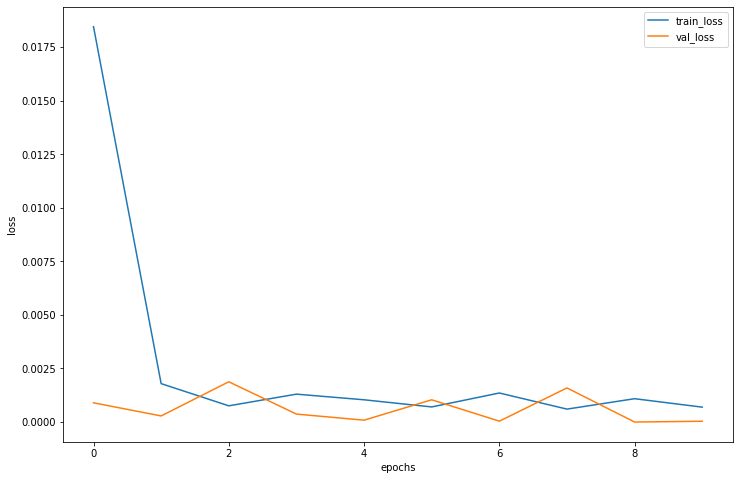

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

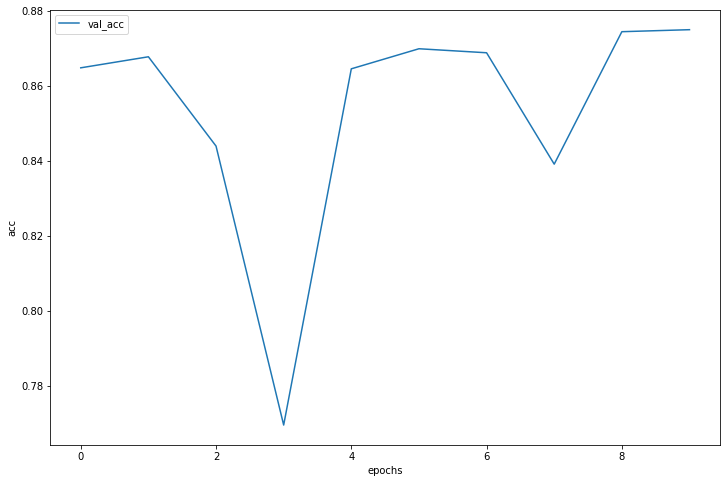

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', test_acc)

test loss = 0.0020332885812205117
test accuracy = 0.8563327032136107


In [ ]:
torch.cuda.empty_cache()

In [ ]:
# margin=1.1

from models import inception_resnet_v1
# берем готовую модель и заменяем классификатор на Linear(in_features=512, out_features=1000, bias=True)
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)
model.to(device)
# загрузить веса нашей нейросети my_model
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model_weights1.pth'))
#drop a last layer of trained network
model.logits = torch.nn.Identity()

#Unfreeze N last layers
for param in model.block8.parameters():
    param.requires_grad = True 
for param in model.last_linear.parameters():
    param.requires_grad = True 
for param in model.last_bn.parameters():
    param.requires_grad = True 
for param in model.logits.parameters():
    param.requires_grad = True 

# В качестве cost function используем TripletLoss
margin = 1.1
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
loss_fn = torch.nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - cos(x, y), margin=margin, reduction='mean')

# Обучаем Unfreeze layers
optimizer = optim.Adam(list(model.block8.parameters())+list(model.last_linear.parameters())+list(model.last_bn.parameters())+list(model.logits.parameters()), lr=1e-4)
# Умножает learning_rate на 0.1 каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# обучение модели
num_epochs=10
history = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train epoch 1
train loss 0.21259419352501852
eval epoch 1
val loss 0.14915907611508059
val accuracy 0.8394004282655246

Epoch 001 train_loss: 0.2126     val_loss 0.1492 val_acc 0.8394
train epoch 2
train loss 0.13105297618620915
eval epoch 2
val loss 0.11858508098527502
val accuracy 0.8707173447537474

Epoch 002 train_loss: 0.1311     val_loss 0.1186 val_acc 0.8707
train epoch 3
train loss 0.13650973876193734
eval epoch 3
val loss 0.13074159703558466
val accuracy 0.8768736616702356

Epoch 003 train_loss: 0.1365     val_loss 0.1307 val_acc 0.8769
train epoch 4
train loss 0.12702391411012517
eval epoch 4
val loss 0.12894882241411562
val accuracy 0.8881156316916489

Epoch 004 train_loss: 0.1270     val_loss 0.1289 val_acc 0.8881
train epoch 5
train loss 0.12596712627714124
eval epoch 5
val loss 0.12156358530756876
val accuracy 0.8878479657387581

Epoch 005 train_loss: 0.1260     val_loss 0.1216 val_acc 0.8878
train epoch 6
train loss 0.13060088686479734
eval epoch 6
val loss 0.13534039906

In [ ]:
loss, val_loss, val_acc = zip(*history)

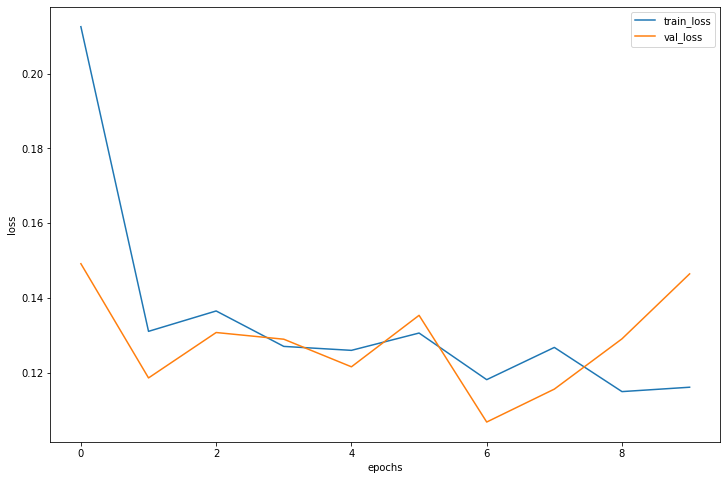

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

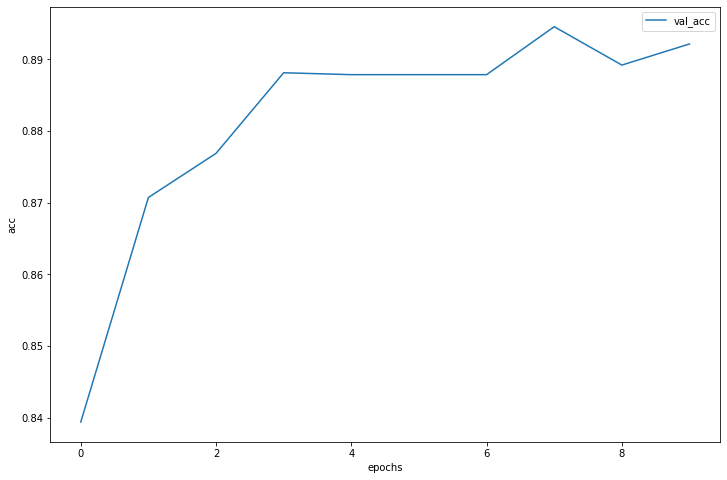

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', test_acc)

test loss = 0.12572891700827407
test accuracy = 0.8780718336483933


In [ ]:
# сохранить веса нашей нейросети model
torch.save(model.state_dict(), '/content/drive/MyDrive/my_model_weights_triplet_loss.pth')

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# margin=0.9

from models import inception_resnet_v1
# берем готовую модель и заменяем классификатор на Linear(in_features=512, out_features=1000, bias=True)
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)
model.to(device)
# загрузить веса нашей нейросети my_model
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model_weights1.pth'))
#drop a last layer of trained network
model.logits = torch.nn.Identity()

#Unfreeze N last layers
for param in model.block8.parameters():
    param.requires_grad = True 
for param in model.last_linear.parameters():
    param.requires_grad = True 
for param in model.last_bn.parameters():
    param.requires_grad = True 
for param in model.logits.parameters():
    param.requires_grad = True 

# В качестве cost function используем TripletLoss
margin = 0.9
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
loss_fn = torch.nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - cos(x, y), margin=margin, reduction='mean')

# Обучаем Unfreeze layers
optimizer = optim.Adam(list(model.block8.parameters())+list(model.last_linear.parameters())+list(model.last_bn.parameters())+list(model.logits.parameters()), lr=1e-4)
# Умножает learning_rate на 0.1 каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# обучение модели
num_epochs=10
history = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train epoch 1
train loss 0.081019755047447
eval epoch 1
val loss 0.02099659994077057
val accuracy 0.859475374732334

Epoch 001 train_loss: 0.0810     val_loss 0.0210 val_acc 0.8595
train epoch 2
train loss 0.025338580478963386
eval epoch 2
val loss 0.020483294039230784
val accuracy 0.841541755888651

Epoch 002 train_loss: 0.0253     val_loss 0.0205 val_acc 0.8415
train epoch 3
train loss 0.019476874718252993
eval epoch 3
val loss 0.015646958380650403
val accuracy 0.8792826552462527

Epoch 003 train_loss: 0.0195     val_loss 0.0156 val_acc 0.8793
train epoch 4
train loss 0.02244802273889497
eval epoch 4
val loss 0.015243686286920015
val accuracy 0.8717880085653106

Epoch 004 train_loss: 0.0224     val_loss 0.0152 val_acc 0.8718
train epoch 5
train loss 0.02056454319945214
eval epoch 5
val loss 0.02289399705683649
val accuracy 0.8800856531049251

Epoch 005 train_loss: 0.0206     val_loss 0.0229 val_acc 0.8801
train epoch 6
train loss 0.01843245387862708
eval epoch 6
val loss 0.0228682252

In [ ]:
loss, val_loss, val_acc = zip(*history)

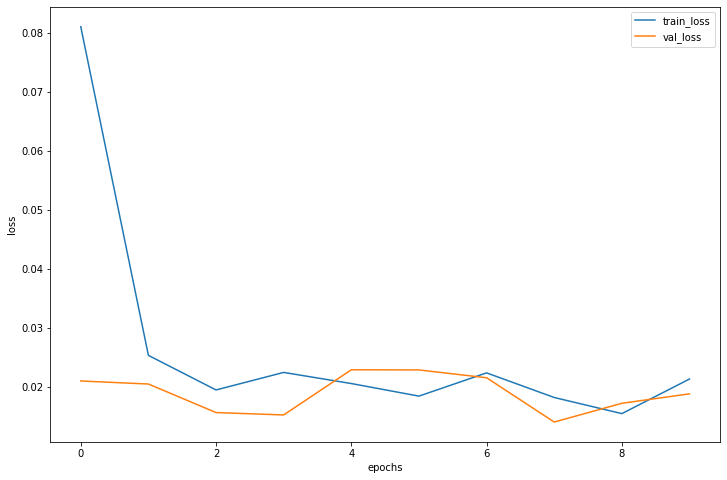

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

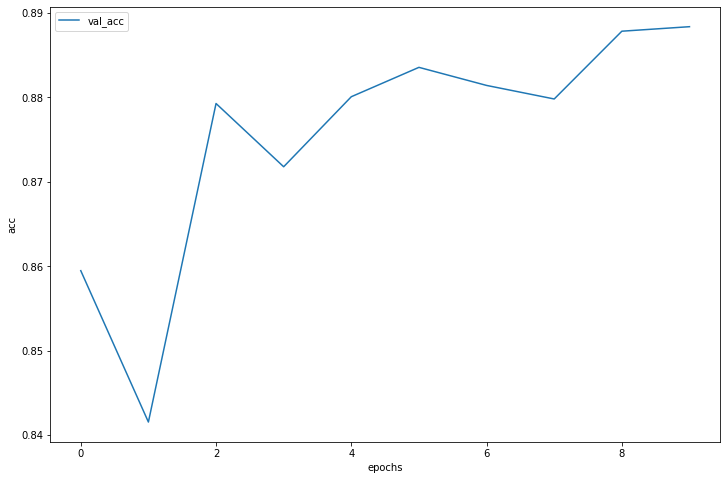

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', test_acc)

test loss = 0.006758510722399049
test accuracy = 0.8632640201638312


In [ ]:
# margin=1.3

from models import inception_resnet_v1
# берем готовую модель и заменяем классификатор на Linear(in_features=512, out_features=1000, bias=True)
model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000)
model.to(device)
# загрузить веса нашей нейросети my_model
model.load_state_dict(torch.load('/content/drive/MyDrive/my_model_weights1.pth'))
#drop a last layer of trained network
model.logits = torch.nn.Identity()

#Unfreeze N last layers
for param in model.block8.parameters():
    param.requires_grad = True 
for param in model.last_linear.parameters():
    param.requires_grad = True 
for param in model.last_bn.parameters():
    param.requires_grad = True 
for param in model.logits.parameters():
    param.requires_grad = True 

# В качестве cost function используем TripletLoss
margin = 1.3
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6).to(device)
loss_fn = torch.nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - cos(x, y), margin=margin, reduction='mean')

# Обучаем Unfreeze layers
optimizer = optim.Adam(list(model.block8.parameters())+list(model.last_linear.parameters())+list(model.last_bn.parameters())+list(model.logits.parameters()), lr=1e-4)
# Умножает learning_rate на 0.1 каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# обучение модели
num_epochs=10
history = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train epoch 1
train loss 0.4210495883582525
eval epoch 1
val loss 0.3375723483220413
val accuracy 0.8372591006423983

Epoch 001 train_loss: 0.4210     val_loss 0.3376 val_acc 0.8373
train epoch 2
train loss 0.32376430455732125
eval epoch 2
val loss 0.3084126487533847
val accuracy 0.8650963597430408

Epoch 002 train_loss: 0.3238     val_loss 0.3084 val_acc 0.8651
train epoch 3
train loss 0.3101747597917899
eval epoch 3
val loss 0.3115680507629535
val accuracy 0.8822269807280514

Epoch 003 train_loss: 0.3102     val_loss 0.3116 val_acc 0.8822
train epoch 4
train loss 0.3232560539059494
eval epoch 4
val loss 0.3189274344505539
val accuracy 0.8559957173447538

Epoch 004 train_loss: 0.3233     val_loss 0.3189 val_acc 0.8560
train epoch 5
train loss 0.3178845340822669
eval epoch 5
val loss 0.32878259175339397
val accuracy 0.8816916488222698

Epoch 005 train_loss: 0.3179     val_loss 0.3288 val_acc 0.8817
train epoch 6
train loss 0.308861519303949
eval epoch 6
val loss 0.3546745470810753
val 

In [ ]:
loss, val_loss, val_acc = zip(*history)

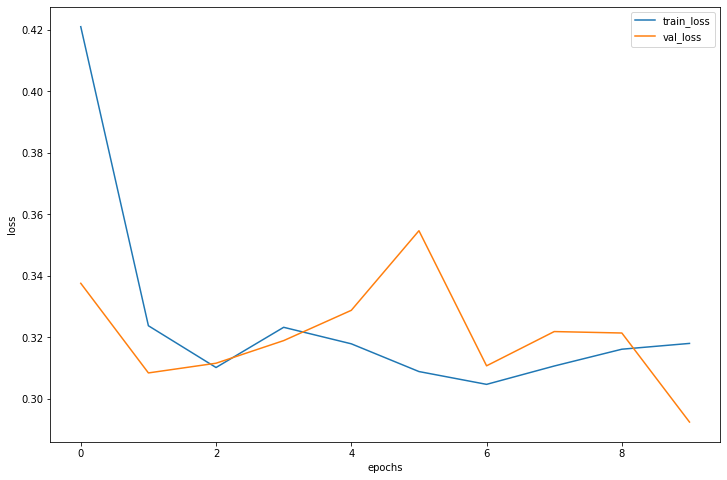

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

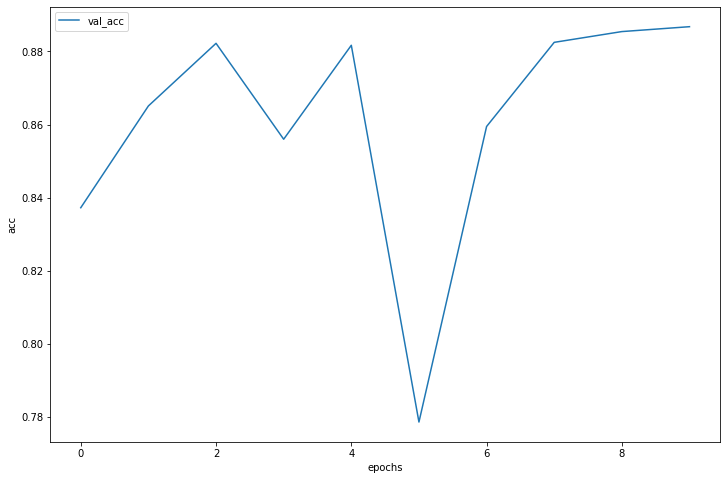

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', test_acc)

test loss = 0.3113486598555067
test accuracy = 0.8613736609955892


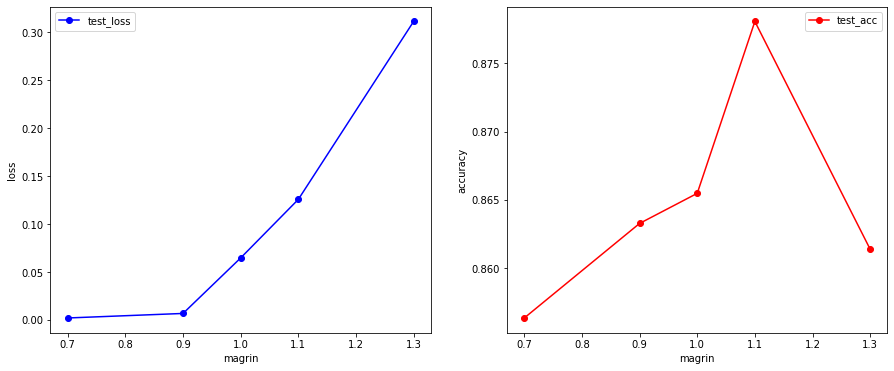

In [ ]:
magrin = [0.7, 0.9, 1.0, 1.1, 1.3]
test_loss = [0.0020332885812205117, 0.006758510722399049, 0.06466911100062396, 0.12572891700827407, 0.3113486598555067]
test_acc = [0.8563327032136107, 0.8632640201638312, 0.8654694391934468, 0.8780718336483933, 0.8613736609955892]

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(magrin, test_loss, 'bo-', label="test_loss")
plt.legend(loc='best')
plt.xlabel("magrin")
plt.ylabel("loss")

plt.subplot(122)
plt.plot(magrin, test_acc, 'ro-', label="test_acc")
plt.legend(loc='best')
plt.xlabel("magrin")
plt.ylabel("accuracy")
plt.show()

**Вывод:**

Таким образом, был выполнен fine tuning с использованием функции потерь TripletLoss для дообученной ранее модели inception resnet v1. 

Были протестированы различные значения параметра margin = [0.7, 0.9, 1.0, 1.1, 1.3]

Наилучшее значение точности модели на тестовой выборке test accuracy = 0.878 было достигнуто при параметре margin = 1.1


### ArcFace Loss (Additive Angular Margin Loss) (25% points)

This loss is somewhat "SOTA" for face recognition systems (somewhat — because actually different variants of losses and their combinations may be the best for different network architectures). This loss inherits idea from CE loss but further develops it to achieve better embeddings distribution on a sphere. It introduces some geodesic constraints to enhance intra-class compactness and inter-class discrepancy.



**How ArcFace loss works**:

This loss is a variation of a standard SoftMax CE loss, which enforces embeddings of different classes (people) be further away: have a more sparse representation of embeddings in embedding space, enforce more evident gap between the nearest classes.

The standard SoftMax CE loss for classification task is presented as follows:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

where:
- $x_i \in \mathbb{R^d}$ denotes the deep feature of the $i$-th sample, belonging to the $y_i$-th class;
- $W_j \in \mathbb{R^d}$ denotes the j-th column of the weight;
- $W \in \mathbb{R^d}$ and $b_j \in \mathbb{R^d}$ is the bias term;
- $N$ — batch size;
- $n$ — class number.

It appears, that, though this loss works well, it does not explicitly optimise the feature embedding to enforce higher similarity for intra- class samples and diversity for inter-class samples, which results in a performance gap for deep face recognition under large intra-class appearance variations.

Let's do some work on this loss formula:
- fix the bias $b_j=0$;
- normalize weight ||$W_j$|| = 1;
- normalize embedding ||$x_i$|| = 1 and re-scale it to s (s is a hyperparameter)

The normalisation step on embeddings and weights makes the predictions only depend on the angle between the embedding and the weight. The learned embeddings fare thus distributed on a hypersphere with a radius of s.

So we get the following loss function now:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Final step: let's add an additive angular margin penalty $m$ between $x_i$ and $W_{y_i}$ to simultaneously enhance the intra-class compactness and inter-class discrepancy:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

SO this is an ArcFace loss. It has 2 hyperparameters: s and m.

The original paper to read about ArcFace more precisely: https://arxiv.org/pdf/1801.07698.pdf

The original repo, where you can find a code sample: https://github.com/deepinsight/insightface

**Task**: implement a model and train it with ArcFace loss. Play with ArcFace loss parameters and see if you can beat a model with CE loss.

To get the full mark for this task you need to train a model using TripletLoss correctly at least for one value of margin and achieve >=75% acc on test set.

In [1]:
# this link won't work for you, if you want to generate working link, 
# visit 500 classes https://askubuntu.com/questions/1188381/how-to-get-link-of-file-to-download-with-wget
# 1000 classes https://disk.yandex.ru/d/FVFucEDrZaxI9g
# or download the data and place it to folder manually
! wget "https://s765sas.storage.yandex.net/rdisk/2343e87d5f3eeca411ab7dda3a32536966dd70b39b0de80077c40a7bc278eee8/6208090f/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid=182045977&filename=celebA_train_1k.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=182045977&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2&etag=0e9fb41a19ad84f907bc167bbc55bb03&rtoken=KHSEhuhlFKbt&force_default=yes&ycrid=na-fe0a67fef38c666f12987b75d714ea39-downloader8e&ts=5d7d71c3921c0&s=a7189336caf37f39a95bb32d7db3fdd9c024649f752be59a280e29ecaa6487bb&pb=U2FsdGVkX18fuSb6kZbTI9oAMnychAIOmkhyHVsyCBes27FKSvL23lgnCCRpzBa9KHc8kXv4Ogk3-1L2DKrsBrLVAz2kJejppKtv-A6MZFc" -O celebA.zip
! unzip celebA.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: celebA_train_1k/celebA_imgs/049159.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._049159.jpg  
  inflating: celebA_train_1k/celebA_imgs/105435.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._105435.jpg  
  inflating: celebA_train_1k/celebA_imgs/068197.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._068197.jpg  
  inflating: celebA_train_1k/celebA_imgs/092985.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._092985.jpg  
  inflating: celebA_train_1k/celebA_imgs/057367.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._057367.jpg  
  inflating: celebA_train_1k/celebA_imgs/097625.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._097625.jpg  
  inflating: celebA_train_1k/celebA_imgs/157415.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_imgs/._157415.jpg  
  inflating: celebA_train_1k/celebA_imgs/131790.jpg  
  inflating: __MACOSX/celebA_train_1k/celebA_

In [28]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform
from tqdm.autonotebook import tqdm, trange

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import torch.nn as nn
import torch.nn.functional as F
import math

import matplotlib.pyplot as plt

import torch.optim as optim
from torch.optim import lr_scheduler

import time

In [29]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)


class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_name) 
        sample = [image, int(label)]
        sample[0] = self.transform(sample[0])

        return sample

In [30]:
train_transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.RandomHorizontalFlip(), # нужно для Data Augmentation (добавляем в обучающий датасет картинки, отраженные по горизонтали)
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', train_transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

# choose your own batch_size
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

Cloning into 'facenet-pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 28.93 MiB/s, done.
Resolving deltas: 100% (619/619), done.


In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [31]:
from models import inception_resnet_v1

In [32]:
class ArcModule(nn.Module):
    def __init__(self, in_features, out_features, s = 10, m = 0.5):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_normal_(self.weight)

        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = torch.tensor(math.cos(math.pi - m))
        self.mm = torch.tensor(math.sin(math.pi - m) * m)

    def forward(self, inputs, labels):
        cos_th = F.linear(inputs, F.normalize(self.weight))
        cos_th = cos_th.clamp(-1, 1)
        sin_th = torch.sqrt(1.0 - torch.pow(cos_th, 2))
        cos_th_m = cos_th * self.cos_m - sin_th * self.sin_m
        cos_th_m = torch.where(cos_th > self.th, cos_th_m, cos_th - self.mm)

        cond_v = cos_th - self.th
        cond = cond_v <= 0
        cos_th_m[cond] = (cos_th - self.mm)[cond]

        if labels.dim() == 1:
            labels = labels.unsqueeze(-1)
        onehot = torch.zeros(cos_th.size()).cuda()
        labels = labels.type(torch.LongTensor).cuda()
        onehot.scatter_(1, labels, 1.0)
        outputs = onehot * cos_th_m + (1.0 - onehot) * cos_th
        outputs = outputs * self.s
        return outputs

In [33]:
class MyNet(nn.Module):
    def __init__(self, channel_size=512, out_feature=1000, scaler=30, margin=0.5):
        super().__init__()
        self.model = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True)
        #drop a last layer of trained network
        self.model.logits = torch.nn.Identity()
        self.channel_size = channel_size
        self.out_feature = out_feature
        self.scaler = scaler
        self.margin = margin
        #self.arcface = ArcFace()
        self.arcface = ArcModule(in_features=self.channel_size, out_features = self.out_feature, s = scaler, m = margin)
        
    def forward(self, x, labels=None):
        
        x = self.model(x)
        x = F.normalize(x)
        if labels is not None:
            return self.arcface(x, labels)
        
        return x

In [9]:
# В качестве cost function используем ArcFace loss с параметрами:
scaler = 15
margin = 0.1

arc_model = MyNet(scaler=scaler, margin=margin)
arc_model.to(device);

In [10]:
arc_model

MyNet(
  (model): InceptionResnetV1(
    (conv2d_1a): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2a): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (conv2d_2b): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2d_3b): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_ru

In [12]:
for param in arc_model.model.parameters():
    param.requires_grad = False

#Unfreeze N last layers
for param in arc_model.model.block8.parameters():
    param.requires_grad = True 
for param in arc_model.model.last_linear.parameters():
    param.requires_grad = True 
for param in arc_model.model.last_bn.parameters():
    param.requires_grad = True 
for param in arc_model.arcface.parameters():
    param.requires_grad = True 

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(arc_model.model.block8.parameters())+list(arc_model.model.last_linear.parameters())+list(arc_model.model.last_bn.parameters())+list(arc_model.arcface.parameters()), lr=1e-4)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [14]:
# оценка модели на одной эпохе
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    # итерируемся по батчам
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.set_grad_enabled(False):
            outputs = model(inputs, labels)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    
    return val_loss, val_acc

In [15]:
# обучение модели на одной эпохе
def fit_epoch(model, train_loader, criterion, optimizer):
    model.train(True)
    
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    # итерируемся по батчам
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad() # обнуляем градиенты

        outputs = model(inputs, labels) # получаем выход модели для обучающих данных
        
        loss = criterion(outputs, labels) # считаем ф-ю потерь
        loss.backward() # вычисление градиентов (backpropagation)
        optimizer.step() # изменение весов модеели
        preds = torch.argmax(outputs, 1) # извлекаем предсказания из выхода модели (как максимальное значение для класса)

        # статистика
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data # считаем loss по эпохе
    train_acc = running_corrects.cpu().numpy() / processed_data # считаем accuracy по эпохе
    
    return train_loss, train_acc

In [16]:
def train_model(model, criterion, opt, scheduler, epochs=25):

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"
    best_val = 0

    with tqdm(desc="epoch", total=epochs) as pbar_outer:

        for epoch in range(epochs):
            scheduler.step()
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))

            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
    
    return history

In [16]:
# обучение модели
num_epochs=20
history = train_model(arc_model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)

epoch:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



Epoch 001 train_loss: 7.4639     val_loss 6.2356 train_acc 0.0038 val_acc 0.0396

Epoch 002 train_loss: 5.5873     val_loss 4.8765 train_acc 0.1024 val_acc 0.2101

Epoch 003 train_loss: 4.3031     val_loss 3.6867 train_acc 0.3372 val_acc 0.4762

Epoch 004 train_loss: 3.3355     val_loss 2.9112 train_acc 0.5525 val_acc 0.6245

Epoch 005 train_loss: 2.5927     val_loss 2.3799 train_acc 0.6991 val_acc 0.6986

Epoch 006 train_loss: 2.0257     val_loss 2.4742 train_acc 0.8006 val_acc 0.6609

Epoch 007 train_loss: 1.6572     val_loss 1.8842 train_acc 0.8600 val_acc 0.7802

Epoch 008 train_loss: 1.5772     val_loss 1.9535 train_acc 0.8746 val_acc 0.7661

Epoch 009 train_loss: 1.5199     val_loss 1.8093 train_acc 0.8844 val_acc 0.7926

Epoch 010 train_loss: 1.4863     val_loss 1.7704 train_acc 0.8861 val_acc 0.7960

Epoch 011 train_loss: 1.4426     val_loss 1.7495 train_acc 0.8915 val_acc 0.7979

Epoch 012 train_loss: 1.4004     val_loss 1.7248 train_acc 0.8959 val_acc 0.8006

Epoch 013 train

Неплохо. Но попробуем теперь запустить обучение с разными параметрами. Найдем те, которые дают наилучший результат.

In [37]:
# Перебор параметров
scaler_count=[5, 10, 15, 20, 30]
margin_count=[0.05, 0.1, 0.5, 1, 2]

best_val_acc = 0
best_history = []

for scaler in scaler_count:
  for margin in margin_count:
    print('scaler = ', scaler, ', margin = ', margin)

    arc_model = MyNet(scaler=scaler, margin=margin)
    arc_model.to(device);

    for param in arc_model.model.parameters():
        param.requires_grad = False
    #Unfreeze N last layers
    for param in arc_model.model.block8.parameters():
        param.requires_grad = True 
    for param in arc_model.model.last_linear.parameters():
        param.requires_grad = True 
    for param in arc_model.model.last_bn.parameters():
        param.requires_grad = True 
    for param in arc_model.arcface.parameters():
        param.requires_grad = True 

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(list(arc_model.model.block8.parameters())+list(arc_model.model.last_linear.parameters())+list(arc_model.model.last_bn.parameters())+list(arc_model.arcface.parameters()), lr=1e-4)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    num_epochs=10
    
    history = train_model(arc_model, loss_fn, optimizer, exp_lr_scheduler, num_epochs)
    _, _, _, val_acc = zip(*history)

    if val_acc[-1].item() > 0.8:
        if val_acc[-1].item() > best_val_acc: #сохраняем лучшую модель
            best_val_acc = val_acc[-1].item()
            best_history = history
            torch.save(arc_model.state_dict(), '/content/drive/MyDrive/best_arc_model_weights.pth')

            # Calculate the loss and accuracy on test set after training
            test_loss, test_acc = eval_epoch(arc_model, test_loader, loss_fn)
            print('test loss =', test_loss)
            print('test accuracy =', float(test_acc))


scaler =  5 , margin =  0.05


epoch:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



Epoch 001 train_loss: 6.7915     val_loss 6.3450 train_acc 0.0215 val_acc 0.1445

Epoch 002 train_loss: 6.0821     val_loss 5.7441 train_acc 0.2558 val_acc 0.4334

Epoch 003 train_loss: 5.5441     val_loss 5.2774 train_acc 0.5028 val_acc 0.5958

Epoch 004 train_loss: 5.1075     val_loss 4.8952 train_acc 0.6497 val_acc 0.6702

Epoch 005 train_loss: 4.7532     val_loss 4.6335 train_acc 0.7290 val_acc 0.7010

Epoch 006 train_loss: 4.4425     val_loss 4.3249 train_acc 0.7957 val_acc 0.7645

Epoch 007 train_loss: 4.2425     val_loss 4.3199 train_acc 0.8482 val_acc 0.7521

Epoch 008 train_loss: 4.1979     val_loss 4.2583 train_acc 0.8547 val_acc 0.7711

Epoch 009 train_loss: 4.1707     val_loss 4.2278 train_acc 0.8611 val_acc 0.7733

Epoch 010 train_loss: 4.1459     val_loss 4.2181 train_acc 0.8614 val_acc 0.7728
scaler =  5 , margin =  0.1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 7.0427     val_loss 6.5959 train_acc 0.0031 val_acc 0.0292

Epoch 002 train_loss: 6.3324     val_loss 5.9922 train_acc 0.0884 val_acc 0.2072

Epoch 003 train_loss: 5.7866     val_loss 5.5100 train_acc 0.2854 val_acc 0.3913

Epoch 004 train_loss: 5.3421     val_loss 5.1182 train_acc 0.4525 val_acc 0.5145

Epoch 005 train_loss: 4.9572     val_loss 4.7910 train_acc 0.5890 val_acc 0.5921

Epoch 006 train_loss: 4.6482     val_loss 4.5169 train_acc 0.6716 val_acc 0.6665

Epoch 007 train_loss: 4.4415     val_loss 4.4727 train_acc 0.7456 val_acc 0.6764

Epoch 008 train_loss: 4.3868     val_loss 4.4492 train_acc 0.7615 val_acc 0.6820

Epoch 009 train_loss: 4.3637     val_loss 4.4211 train_acc 0.7702 val_acc 0.6908

Epoch 010 train_loss: 4.3287     val_loss 4.3944 train_acc 0.7803 val_acc 0.6941
scaler =  5 , margin =  0.5


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 8.9747     val_loss 8.5655 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 8.2873     val_loss 7.9457 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 7.7214     val_loss 7.4292 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 7.2331     val_loss 6.9758 train_acc 0.0001 val_acc 0.0019

Epoch 005 train_loss: 6.7864     val_loss 6.5848 train_acc 0.0027 val_acc 0.0075

Epoch 006 train_loss: 6.4013     val_loss 6.2417 train_acc 0.0077 val_acc 0.0209

Epoch 007 train_loss: 6.1392     val_loss 6.1818 train_acc 0.0177 val_acc 0.0241

Epoch 008 train_loss: 6.0860     val_loss 6.1412 train_acc 0.0211 val_acc 0.0289

Epoch 009 train_loss: 6.0508     val_loss 6.1853 train_acc 0.0217 val_acc 0.0236

Epoch 010 train_loss: 6.0141     val_loss 6.0797 train_acc 0.0240 val_acc 0.0337
scaler =  5 , margin =  1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 10.9041     val_loss 10.6454 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 10.4082     val_loss 10.1286 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 9.9487     val_loss 9.6859 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 9.5200     val_loss 9.2653 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 9.1058     val_loss 8.8906 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 8.7240     val_loss 8.5292 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 8.4450     val_loss 8.4642 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 8.3992     val_loss 8.4249 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 8.3628     val_loss 8.4405 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 8.3388     val_loss 8.3619 train_acc 0.0000 val_acc 0.0000
scaler =  5 , margin =  2


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 15.6255     val_loss 15.1866 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 14.9181     val_loss 14.5111 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 14.1587     val_loss 13.5894 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 13.2753     val_loss 12.9454 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 12.7596     val_loss 12.8155 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 12.4979     val_loss 12.9074 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 12.3208     val_loss 12.5881 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 12.3093     val_loss 12.5930 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 12.2891     val_loss 12.5900 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 12.2717     val_loss 12.6896 train_acc 0.0000 val_acc 0.0000
scaler =  10 , margin =  0.05


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 6.7502     val_loss 5.9222 train_acc 0.0259 val_acc 0.1510

Epoch 002 train_loss: 5.4368     val_loss 4.8374 train_acc 0.2744 val_acc 0.4698

Epoch 003 train_loss: 4.4894     val_loss 4.0358 train_acc 0.5295 val_acc 0.6221

Epoch 004 train_loss: 3.7356     val_loss 3.4115 train_acc 0.6951 val_acc 0.7160

Epoch 005 train_loss: 3.1384     val_loss 2.9201 train_acc 0.7875 val_acc 0.7709

Epoch 006 train_loss: 2.6638     val_loss 2.5388 train_acc 0.8489 val_acc 0.8075

Epoch 007 train_loss: 2.3172     val_loss 2.4748 train_acc 0.8937 val_acc 0.8164

Epoch 008 train_loss: 2.2628     val_loss 2.4296 train_acc 0.9041 val_acc 0.8175

Epoch 009 train_loss: 2.2183     val_loss 2.4233 train_acc 0.9046 val_acc 0.8126

Epoch 010 train_loss: 2.1836     val_loss 2.3606 train_acc 0.9080 val_acc 0.8228
test loss = 2.3804900462926373
test accuracy = 0.8185255198487713
scaler =  10 , margin =  0.1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 7.2425     val_loss 6.3884 train_acc 0.0045 val_acc 0.0327

Epoch 002 train_loss: 5.9097     val_loss 5.4464 train_acc 0.1014 val_acc 0.1601

Epoch 003 train_loss: 4.9377     val_loss 4.4580 train_acc 0.3198 val_acc 0.4499

Epoch 004 train_loss: 4.1812     val_loss 4.0807 train_acc 0.5150 val_acc 0.4845

Epoch 005 train_loss: 3.5535     val_loss 3.3115 train_acc 0.6528 val_acc 0.6734

Epoch 006 train_loss: 3.0337     val_loss 3.3510 train_acc 0.7525 val_acc 0.6063

Epoch 007 train_loss: 2.6781     val_loss 2.8274 train_acc 0.8196 val_acc 0.7366

Epoch 008 train_loss: 2.6240     val_loss 2.7659 train_acc 0.8280 val_acc 0.7457

Epoch 009 train_loss: 2.5682     val_loss 2.7212 train_acc 0.8338 val_acc 0.7527

Epoch 010 train_loss: 2.5122     val_loss 2.6983 train_acc 0.8435 val_acc 0.7537
scaler =  10 , margin =  0.5


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 11.1130     val_loss 10.3183 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 9.8299     val_loss 9.1965 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 8.8172     val_loss 8.2891 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 7.9747     val_loss 7.5371 train_acc 0.0008 val_acc 0.0032

Epoch 005 train_loss: 7.2079     val_loss 6.8693 train_acc 0.0032 val_acc 0.0102

Epoch 006 train_loss: 6.5391     val_loss 6.2983 train_acc 0.0116 val_acc 0.0313

Epoch 007 train_loss: 6.0678     val_loss 6.2554 train_acc 0.0249 val_acc 0.0316

Epoch 008 train_loss: 5.9734     val_loss 6.1132 train_acc 0.0305 val_acc 0.0418

Epoch 009 train_loss: 5.9083     val_loss 6.0843 train_acc 0.0352 val_acc 0.0412

Epoch 010 train_loss: 5.8427     val_loss 6.1916 train_acc 0.0384 val_acc 0.0324
scaler =  10 , margin =  1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 14.9582     val_loss 14.4107 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 14.0735     val_loss 13.5739 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 13.2874     val_loss 12.8321 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 12.5499     val_loss 12.1478 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 11.8811     val_loss 11.5129 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 11.2669     val_loss 10.9973 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 10.7594     val_loss 10.8146 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 10.6730     val_loss 11.2053 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 10.6104     val_loss 10.7036 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 10.5411     val_loss 10.6455 train_acc 0.0000 val_acc 0.0000
scaler =  10 , margin =  2


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 24.4256     val_loss 23.5936 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 23.1146     val_loss 22.4448 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 21.8226     val_loss 20.7896 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 20.2219     val_loss 20.1998 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 19.2011     val_loss 19.0236 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 18.6909     val_loss 19.0790 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 18.2055     val_loss 18.8302 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 18.1536     val_loss 18.7718 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 18.1231     val_loss 18.7541 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 18.0705     val_loss 18.7902 train_acc 0.0000 val_acc 0.0000
scaler =  15 , margin =  0.05


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 6.7251     val_loss 5.5132 train_acc 0.0274 val_acc 0.1531

Epoch 002 train_loss: 4.8645     val_loss 4.0537 train_acc 0.2895 val_acc 0.4853

Epoch 003 train_loss: 3.6086     val_loss 3.0599 train_acc 0.5742 val_acc 0.6689

Epoch 004 train_loss: 2.7314     val_loss 2.5446 train_acc 0.7339 val_acc 0.7179

Epoch 005 train_loss: 2.0579     val_loss 1.9142 train_acc 0.8330 val_acc 0.8094

Epoch 006 train_loss: 1.5994     val_loss 1.5765 train_acc 0.8871 val_acc 0.8410

Epoch 007 train_loss: 1.2595     val_loss 1.5138 train_acc 0.9291 val_acc 0.8506

Epoch 008 train_loss: 1.2182     val_loss 1.4879 train_acc 0.9300 val_acc 0.8504

Epoch 009 train_loss: 1.1749     val_loss 1.4592 train_acc 0.9326 val_acc 0.8528

Epoch 010 train_loss: 1.1632     val_loss 1.4843 train_acc 0.9345 val_acc 0.8437
test loss = 1.5123490078613002
test accuracy = 0.8462507876496534
scaler =  15 , margin =  0.1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 7.4602     val_loss 6.2442 train_acc 0.0033 val_acc 0.0367

Epoch 002 train_loss: 5.5852     val_loss 4.7426 train_acc 0.1046 val_acc 0.2540

Epoch 003 train_loss: 4.2886     val_loss 3.6868 train_acc 0.3406 val_acc 0.4767

Epoch 004 train_loss: 3.3350     val_loss 3.4119 train_acc 0.5499 val_acc 0.4901

Epoch 005 train_loss: 2.5732     val_loss 2.3575 train_acc 0.7021 val_acc 0.7147

Epoch 006 train_loss: 2.0162     val_loss 1.9732 train_acc 0.8016 val_acc 0.7551

Epoch 007 train_loss: 1.6242     val_loss 1.8898 train_acc 0.8711 val_acc 0.7762

Epoch 008 train_loss: 1.5726     val_loss 1.8483 train_acc 0.8743 val_acc 0.7829

Epoch 009 train_loss: 1.5097     val_loss 1.8043 train_acc 0.8855 val_acc 0.7837

Epoch 010 train_loss: 1.4541     val_loss 1.7711 train_acc 0.8933 val_acc 0.7891
scaler =  15 , margin =  0.5


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 13.2764     val_loss 12.1362 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 11.4797     val_loss 10.8582 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 10.1231     val_loss 9.4246 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 8.9915     val_loss 9.1322 train_acc 0.0003 val_acc 0.0000

Epoch 005 train_loss: 8.0002     val_loss 7.5679 train_acc 0.0047 val_acc 0.0169

Epoch 006 train_loss: 7.1303     val_loss 7.5227 train_acc 0.0163 val_acc 0.0123

Epoch 007 train_loss: 6.4513     val_loss 6.6590 train_acc 0.0325 val_acc 0.0420

Epoch 008 train_loss: 6.3198     val_loss 6.8636 train_acc 0.0379 val_acc 0.0332

Epoch 009 train_loss: 6.2098     val_loss 6.4854 train_acc 0.0433 val_acc 0.0503

Epoch 010 train_loss: 6.1696     val_loss 6.4332 train_acc 0.0469 val_acc 0.0522
scaler =  15 , margin =  1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 19.0479     val_loss 18.2757 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 17.8381     val_loss 17.2567 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 16.8149     val_loss 16.2430 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 15.9048     val_loss 15.3937 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 15.0394     val_loss 14.6745 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 14.2098     val_loss 13.8623 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 13.5601     val_loss 14.1164 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 13.3949     val_loss 13.6004 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 13.2741     val_loss 13.5265 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 13.2489     val_loss 13.4702 train_acc 0.0000 val_acc 0.0000
scaler =  15 , margin =  2


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 33.2883     val_loss 32.0769 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 31.4304     val_loss 30.5318 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 29.8164     val_loss 28.4188 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 27.7103     val_loss 26.5534 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 26.1331     val_loss 25.7237 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 25.2455     val_loss 25.3912 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 24.5176     val_loss 26.2864 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 24.3684     val_loss 25.2574 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 24.3653     val_loss 25.2736 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 24.3196     val_loss 25.3120 train_acc 0.0000 val_acc 0.0000
scaler =  20 , margin =  0.05


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 6.7485     val_loss 5.2114 train_acc 0.0281 val_acc 0.1665

Epoch 002 train_loss: 4.4325     val_loss 3.4866 train_acc 0.3200 val_acc 0.5302

Epoch 003 train_loss: 2.9905     val_loss 2.6727 train_acc 0.6117 val_acc 0.6512

Epoch 004 train_loss: 2.0422     val_loss 1.7803 train_acc 0.7826 val_acc 0.7880

Epoch 005 train_loss: 1.4593     val_loss 1.4580 train_acc 0.8597 val_acc 0.8204

Epoch 006 train_loss: 1.0662     val_loss 1.1692 train_acc 0.9053 val_acc 0.8552

Epoch 007 train_loss: 0.7800     val_loss 1.1065 train_acc 0.9464 val_acc 0.8670

Epoch 008 train_loss: 0.7247     val_loss 1.0876 train_acc 0.9516 val_acc 0.8616

Epoch 009 train_loss: 0.7143     val_loss 1.2782 train_acc 0.9535 val_acc 0.8343

Epoch 010 train_loss: 0.6841     val_loss 1.0557 train_acc 0.9538 val_acc 0.8678
test loss = 1.0971072025094757
test accuracy = 0.8616887208569628
scaler =  20 , margin =  0.1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 7.7896     val_loss 6.2274 train_acc 0.0016 val_acc 0.0284

Epoch 002 train_loss: 5.4198     val_loss 4.5105 train_acc 0.1063 val_acc 0.2315

Epoch 003 train_loss: 3.8876     val_loss 3.2050 train_acc 0.3656 val_acc 0.4984

Epoch 004 train_loss: 2.7916     val_loss 2.4244 train_acc 0.5890 val_acc 0.6445

Epoch 005 train_loss: 2.0193     val_loss 2.3070 train_acc 0.7351 val_acc 0.6362

Epoch 006 train_loss: 1.4669     val_loss 1.5554 train_acc 0.8283 val_acc 0.7773

Epoch 007 train_loss: 1.1372     val_loss 1.4982 train_acc 0.8873 val_acc 0.7869

Epoch 008 train_loss: 1.1145     val_loss 1.4584 train_acc 0.8898 val_acc 0.7910

Epoch 009 train_loss: 1.0137     val_loss 1.4363 train_acc 0.9046 val_acc 0.7939

Epoch 010 train_loss: 0.9990     val_loss 1.3941 train_acc 0.9070 val_acc 0.7995
scaler =  20 , margin =  0.5


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 15.5008     val_loss 14.0301 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 13.2583     val_loss 12.1972 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 11.6178     val_loss 10.8104 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 10.2758     val_loss 10.0718 train_acc 0.0002 val_acc 0.0008

Epoch 005 train_loss: 9.0849     val_loss 8.6100 train_acc 0.0038 val_acc 0.0126

Epoch 006 train_loss: 8.0176     val_loss 7.6984 train_acc 0.0144 val_acc 0.0327

Epoch 007 train_loss: 7.1578     val_loss 7.4991 train_acc 0.0294 val_acc 0.0396

Epoch 008 train_loss: 6.9583     val_loss 8.1577 train_acc 0.0360 val_acc 0.0206

Epoch 009 train_loss: 6.8688     val_loss 7.2952 train_acc 0.0382 val_acc 0.0498

Epoch 010 train_loss: 6.7755     val_loss 7.2190 train_acc 0.0446 val_acc 0.0557
scaler =  20 , margin =  1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 23.1819     val_loss 22.2201 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 21.7074     val_loss 20.9432 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 20.5375     val_loss 20.2989 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 19.4727     val_loss 18.9091 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 18.4623     val_loss 17.9796 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 17.5721     val_loss 17.9531 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 16.7546     val_loss 16.9258 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 16.5335     val_loss 16.8101 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 16.4181     val_loss 16.7428 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 16.3376     val_loss 16.6423 train_acc 0.0000 val_acc 0.0000
scaler =  20 , margin =  2


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 42.1639     val_loss 40.5858 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 39.8087     val_loss 38.7410 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 38.0105     val_loss 36.4709 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 35.6119     val_loss 34.6737 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 33.5662     val_loss 32.8346 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 32.2907     val_loss 34.7712 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 31.2442     val_loss 32.4867 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 31.0152     val_loss 32.1130 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 30.9678     val_loss 32.1719 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 30.9539     val_loss 33.1250 train_acc 0.0000 val_acc 0.0000
scaler =  30 , margin =  0.05


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 7.0009     val_loss 4.8152 train_acc 0.0283 val_acc 0.1734

Epoch 002 train_loss: 3.9022     val_loss 2.7589 train_acc 0.3306 val_acc 0.5688

Epoch 003 train_loss: 2.2829     val_loss 1.7707 train_acc 0.6488 val_acc 0.7398

Epoch 004 train_loss: 1.4132     val_loss 1.2800 train_acc 0.8104 val_acc 0.8070

Epoch 005 train_loss: 0.9684     val_loss 1.0306 train_acc 0.8766 val_acc 0.8391

Epoch 006 train_loss: 0.6722     val_loss 0.8959 train_acc 0.9224 val_acc 0.8576

Epoch 007 train_loss: 0.4364     val_loss 0.8599 train_acc 0.9624 val_acc 0.8654

Epoch 008 train_loss: 0.4161     val_loss 0.8505 train_acc 0.9638 val_acc 0.8635

Epoch 009 train_loss: 0.3960     val_loss 0.8593 train_acc 0.9663 val_acc 0.8589

Epoch 010 train_loss: 0.3728     val_loss 1.2045 train_acc 0.9692 val_acc 0.7891
scaler =  30 , margin =  0.1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 8.5107     val_loss 6.3144 train_acc 0.0025 val_acc 0.0284

Epoch 002 train_loss: 5.3194     val_loss 4.1842 train_acc 0.1072 val_acc 0.2430

Epoch 003 train_loss: 3.4380     val_loss 2.7411 train_acc 0.3719 val_acc 0.5214

Epoch 004 train_loss: 2.2949     val_loss 2.4034 train_acc 0.6011 val_acc 0.5610

Epoch 005 train_loss: 1.5454     val_loss 1.5711 train_acc 0.7528 val_acc 0.7254

Epoch 006 train_loss: 1.1131     val_loss 1.3391 train_acc 0.8310 val_acc 0.7719

Epoch 007 train_loss: 0.7751     val_loss 1.2719 train_acc 0.8997 val_acc 0.7808

Epoch 008 train_loss: 0.7098     val_loss 1.2423 train_acc 0.9120 val_acc 0.7891

Epoch 009 train_loss: 0.7394     val_loss 1.8824 train_acc 0.9039 val_acc 0.6443

Epoch 010 train_loss: 0.6222     val_loss 1.2080 train_acc 0.9268 val_acc 0.7934
scaler =  30 , margin =  0.5


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 20.0896     val_loss 18.6088 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 17.0786     val_loss 15.7590 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 15.0589     val_loss 14.0431 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 13.3664     val_loss 13.3653 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 11.8562     val_loss 11.3172 train_acc 0.0008 val_acc 0.0067

Epoch 006 train_loss: 10.4272     val_loss 10.1781 train_acc 0.0070 val_acc 0.0249

Epoch 007 train_loss: 9.2359     val_loss 9.8520 train_acc 0.0192 val_acc 0.0340

Epoch 008 train_loss: 9.0133     val_loss 9.6736 train_acc 0.0254 val_acc 0.0364

Epoch 009 train_loss: 8.7928     val_loss 9.5713 train_acc 0.0270 val_acc 0.0404

Epoch 010 train_loss: 8.7253     val_loss 10.4163 train_acc 0.0318 val_acc 0.0228
scaler =  30 , margin =  1


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 31.6199     val_loss 30.3104 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 29.7005     val_loss 29.2789 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 28.3362     val_loss 27.6023 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 27.1315     val_loss 26.4923 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 25.9564     val_loss 25.4201 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 24.7866     val_loss 24.4854 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 23.6859     val_loss 24.1438 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 23.4123     val_loss 24.9328 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 23.2400     val_loss 23.7747 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 23.0912     val_loss 23.6437 train_acc 0.0000 val_acc 0.0000
scaler =  30 , margin =  2


epoch:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 001 train_loss: 60.0700     val_loss 57.8996 train_acc 0.0000 val_acc 0.0000

Epoch 002 train_loss: 56.8970     val_loss 55.5470 train_acc 0.0000 val_acc 0.0000

Epoch 003 train_loss: 54.7785     val_loss 53.2535 train_acc 0.0000 val_acc 0.0000

Epoch 004 train_loss: 52.2004     val_loss 50.1161 train_acc 0.0000 val_acc 0.0000

Epoch 005 train_loss: 49.1907     val_loss 47.8642 train_acc 0.0000 val_acc 0.0000

Epoch 006 train_loss: 47.0862     val_loss 46.8171 train_acc 0.0000 val_acc 0.0000

Epoch 007 train_loss: 45.2820     val_loss 47.6074 train_acc 0.0000 val_acc 0.0000

Epoch 008 train_loss: 44.9499     val_loss 46.5702 train_acc 0.0000 val_acc 0.0000

Epoch 009 train_loss: 44.8691     val_loss 47.0931 train_acc 0.0000 val_acc 0.0000

Epoch 010 train_loss: 44.8157     val_loss 46.4010 train_acc 0.0000 val_acc 0.0000


In [38]:
loss, acc, val_loss, val_acc = zip(*best_history)

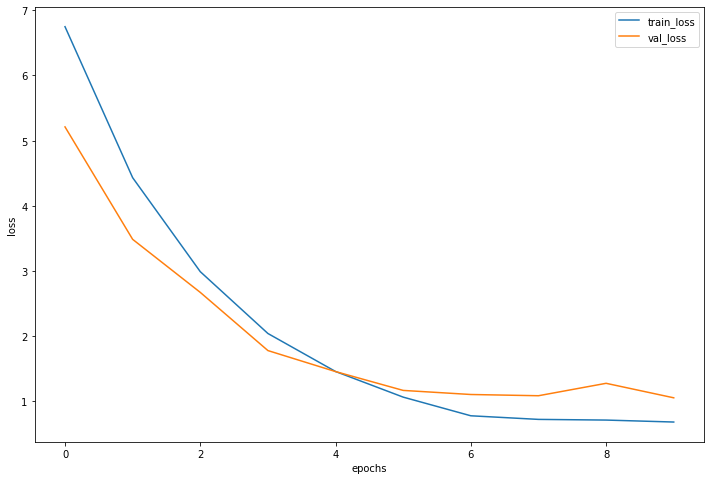

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

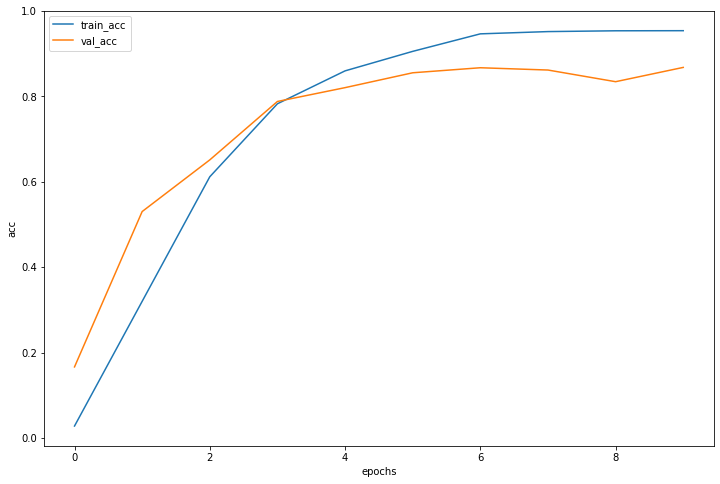

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [34]:
scaler = 20
margin = 0.05

arc_model = MyNet(scaler=scaler, margin=margin)
arc_model.to(device);

In [35]:
# загрузить веса нашей нейросети my_model
arc_model.load_state_dict(torch.load('/content/drive/MyDrive/best_arc_model_weights.pth'))

<All keys matched successfully>

In [19]:
# Calculate the loss and accuracy on test set after training.

test_loss, test_acc = eval_epoch(arc_model, test_loader, loss_fn)
print('test loss =', test_loss)
print('test accuracy =', float(test_acc))

test loss = 1.0971072025094757
test accuracy = 0.8616887208569628


**Вывод:**

Были протестированы разные значения параметров для ArcFace loss для fine tuning нейросети InceptionResnetV1(pretrained='vggface2'):

scaler_count=[5, 10, 15, 20, 30],

margin_count=[0.05, 0.1, 0.5, 1, 2].

Наилучшее значение accuracy получилось при 

scaler =  20 , margin =  0.05. 

За 10 эпох сеть обучилась до следующих значений: 

train_loss = 0.6841, val_loss = 1.0557 

train_acc = 0.9538, val_acc = 0.8678

При этом, на тестовой выборке были получены следующие результаты:

test loss = 1.097

test accuracy = 0.861

## Bonus task (5% points): Finding trash photos 

You have probably noticed that in identification rate calculation we use cosine similarity between embeddings, which includes embeddings' normalization. And in TripletLoss also we normalize embeddings before passing them to the loss. Actually this is how most of the face recognition algorithms work — they are designed to output a normalized embeddings and any comparison between embeddings is done after the embeddings are normalized. Sometimes it may be beneficial even to add a normalization layer (batchnorm or layernorm with fixed parameters) after the model's embedding layer to make the model output normalized embeddings.

But norms of the unnormalized embeddings can also be used. They can be used to detect trash photos — photos, where the face is presented really badly (e.g. back of the head instead of the forehead or even a photo without any head that has appeared in a dataset due to a mistake in face detection / landmarks detection algorithm).

Empirically it has been found that the higher the embedding's norm, the more the probability of the corresponding photo to be trash is. 



**Task**: get the embeddings of photos in a test set / query set / distractors set. Sort them by their norms. Output the photos whose embeddings norms are the highest. Do they look like normal or trash?

**Doing this task will not give you points above 100% for the whole homework. But if you have any mistakes in previous sections, doing this task may give you additional points (5% of total points) to cover points lost.**

In [8]:
#загрузим ранее сохраненные эмбеддинги
query_embeddings = torch.load('/content/drive/MyDrive/query_embeddings.pt')

Найдем query_embeddings с максимальным значением нормы и посмотрим на них

In [41]:
norms = []
for i, an_array in enumerate(query_embeddings):
    norm = np.linalg.norm(an_array)
    norms.append((norm, i))
norms = sorted(norms, key=lambda norm: norm[0], reverse=True)

In [42]:
images_names = []
for norm in norms[:5]:
  index = norm[1]
  print('norm =', norm[0], 'index =', norm[1])
  images_names.append(query_img_names[index])

norm = 586.43085 index = 4439
norm = 565.4182 index = 6823
norm = 521.6298 index = 4447
norm = 513.3722 index = 5958
norm = 511.46262 index = 1467


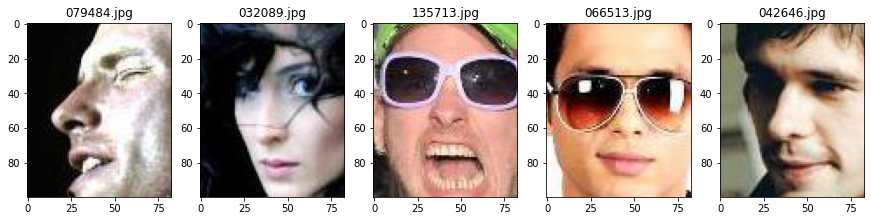

In [43]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_ir/celebA_query/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

show_imgs(images_names)

Действительно, данные изображения лучше не рассматривать, так как они имеют много погрешностей: искажены черты лица, крупные непрозрачные очки, глубокие тени на половину лица, волосы сильно закрывают глаза, изображение в профиль с закрытими глазами.

## What's next

What else can you do with this homework:
1. Try to train the network on faces which are aligned differently (or not aligned at all). The dataset can be downloaded here[link text](https://drive.google.com/drive/folders/0B7EVK8r0v71pTUZsaXdaSnZBZzg?resourcekey=0-rJlzl934LzC-Xp28GeIBzQ)
2. Try to mix different losses while training. This often helps.
3. Try other losses from [this](https://arxiv.org/pdf/1901.05903.pdf) paper
4. Train bigger model on bigger dataset, as whole celebA, add [LFW](http://vis-www.cs.umass.edu/lfw/) and other
5. Explore embeddings spaces you get out of different models. How well are embeddings clasterized? Are they evenly spreaded on the sphere? How could you suggest to make it better?

**Для интереса.**

Банально, но...

Попробую загрузить свое изображение и с помощью fine tuning нейросети InceptionResnetV1(pretrained='vggface2'), показавшей наилучшие результаты обучения, посмотреть к какому классу оно будет ближе всего.

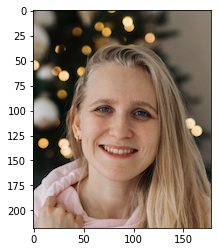

In [19]:
img = Image.open('A62A1292.jpg')
img = np.array(img)
plt.imshow(np.array(img), cmap='gray')

img = np.swapaxes(img,0,2)
img = torch.FloatTensor(img).unsqueeze(0)

In [36]:
def predict_one_sample(model, inputs):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        outputs = model(inputs).cpu()
        preds = torch.argmax(outputs, 1)#.numpy()
    return preds

In [43]:
predict = predict_one_sample(model, img).item()
predict

377

Посмотрим остальные изображения из этого класса. Для этого добавим в класс celebADataset функцию  imagenames

In [44]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)


class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]

        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        
        sample = [image, int(label)]

        sample[0] = self.transform(sample[0])

        return sample

    def imagenames(self, label): #возвращает по переданному лейблу пути до изображений соответствующего класса
        img_names = []
        for l, img in zip(self.labels, self.images):
          if int(l) == label:
            img_names.append(img)
        
        return img_names

In [45]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
train_data = celebADataset('train', transform)

In [46]:
img_names = train_data.imagenames(predict)

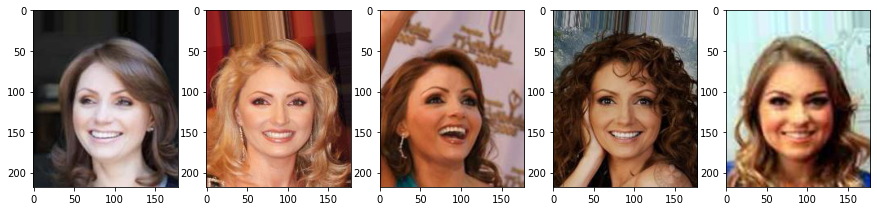

In [49]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(img)
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
    plt.show()

show_imgs(img_names[:5])

Сеть вывела нам милую девушку с красивой улыбкой, а не бородатого мужика. И это уже неплохо.

**Вывод:**

Наилучшие результаты были достигнуты в результате дообучения InceptionResnetV1 сети, предобученной на  VGGFace2. 

При этом, В качестве функции потерь брали стандартную кросс энтропию.

В итоге, удалось получить следующие результаты на тестовой выборке: 

test loss = 0.73

test accuracy = 0.92